In [2503]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2504]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "attack_path_exposure",  "overall_asr_avg", "roa",  "risk", "attack_stage"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + ['hybrid'] + static_features + time_features 
# metrics = ["all_features"] + ['hybrid'] + ["attack_stage"]



{'simultaneous': {'ASR': 2.7187473428775877, 'attack_path_exposure': 0.9285643150295663, 'ROA': 0.9865608304103636, 'risk': 1.1342982945786015}, 'random': {'ASR': 1.478246238530546, 'attack_path_exposure': 0.9289378430855527, 'ROA': 0.7439955163227033, 'risk': 0.9120688329162153}, 'alternative': {'ASR': 1.4724545857803382, 'attack_path_exposure': 0.9266603149694558, 'ROA': 0.7344799416295097, 'risk': 0.9737337639521441}}


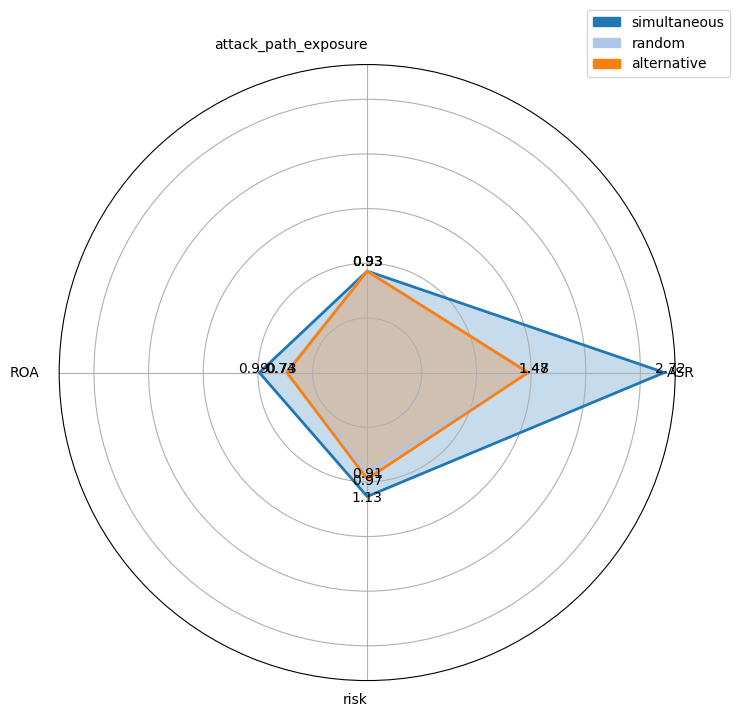

In [2505]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["simultaneous", "random", "alternative"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size',"mtd_interval", 'shortest_path_variability', "exposed_endpoints", "time_to_compromise"], axis = 1).T.to_dict()
# schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["simultaneous", "random", "alternative"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size',"mtd_interval", 'shortest_path_variability',  "total_number_of_ports"], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [2506]:
other_schemes =pd.DataFrame(schemes_data)

In [2507]:
other_schemes

simultaneous    random  alternative
ASR                       2.718747  1.478246     1.472455
attack_path_exposure      0.928564  0.928938     0.926660
ROA                       0.986561  0.743996     0.734480
risk                      1.134298  0.912069     0.973734

In [2508]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
    
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
       
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity",
         metric,
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [2509]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data = all_model_data.drop("time_to_compromise", axis = 0).drop('exposed_endpoints', axis = 0)
# all_model_data = all_model_data.drop("time_to_compromise", axis = 0)


In [2510]:
all_model_data 

all_features_CompleteTopologyShuffle  \
mtd_interval                                           1.000000   
MEF                                                    1.000000   
ASR                                                    1.515148   
host_compromise_ratio                                  0.124947   
network_size                                           1.000000   
total_number_of_ports                               1047.000000   
attack_path_exposure                                   2.215813   
ROA                                                    1.220719   
risk                                                   1.222908   
shortest_path_variability                              1.000000   

                           all_features_IPShuffle  all_features_OSDiversity  \
mtd_interval                             1.000000                  1.000000   
MEF                                      1.000000                  1.000000   
ASR                                      1.701242                  1.565375   
host_compromise_ratio                    0.124947                  0.124947   
network_size                             1.000000                  1.000000   
total_number_of_ports                 1051.800000               1050.800000   
attack_path_exposure                     1.662832                  2.594755   
ROA                                      1.021801                  1.148786   
risk                                     1.037370                  1.084165   
shortest_path_variability                1.000000                  1.000000   

                           all_features_ServiceDiversity  all_features  \
mtd_interval                                    1.000000      1.000000   
MEF                                             1.000000      1.000000   
ASR                                             1.537772      1.554173   
host_compromise_ratio                           0.124947      0.124947   
network_size                                    1.000000      1.000000   
total_number_of_ports                        1050.000000   1049.000000   
attack_path_exposure                            2.617528      2.502179   
ROA                                             1.273370      1.249090   
risk                                            1.179738      1.137075   
shortest_path_variability                       1.000000      1.000000   

                           hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
mtd_interval                                     1.000000          1.000000   
MEF                                              1.000000          1.000000   
ASR                                              1.511779          1.678982   
host_compromise_ratio                            0.840517          0.840517   
network_size                                     1.000000          1.000000   
total_number_of_ports                         1050.000000       1049.400000   
attack_path_exposure                             2.246400          1.675760   
ROA                                              1.243449          1.025649   
risk                                             1.190047          1.013855   
shortest_path_variability                        1.000000          1.000000   

                           hybrid_OSDiversity  hybrid_ServiceDiversity  \
mtd_interval                         1.000000                 1.000000   
MEF                                  1.000000                 1.000000   
ASR                                  1.565805                 1.537456   
host_compromise_ratio                0.840517                 0.840517   
network_size                         1.000000                 1.000000   
total_number_of_ports             1048.000000              1050.000000   
attack_path_exposure                 2.733862                 2.613721   
ROA                                  1.334288                 1.211483   
risk                                 1.234803                 1.1736

In [2511]:
x_values = []
y_values = []
for metric in all_model_data.columns:
     # Check if the metric is "all_features"
    if metric == "all_features":
        model = "all_features"  # You can set the model name explicitly

    else:
        # Split the metric and join back if it is not in metrics
        model = "_".join(metric.split("_")[:-1]) if metric not in metrics else metric
    
   
    
    radar = RadarPlot(model, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network,  "other_scheme", trial, result_head_path)
    metric_data = radar.get_result(result_head_path, metric)
    
    print(metric, metric_data['MEF'].mean())
    x_values.append(metric)
    y_values.append(metric_data['MEF'].mean())


all_features_CompleteTopologyShuffle 0.005037457435428051
all_features_IPShuffle 0.00503306550269768
all_features_OSDiversity 0.005067080145927986
all_features_ServiceDiversity 0.005076433729515243
all_features 0.005057970401790031
hybrid_CompleteTopologyShuffle 0.005037532676843741
hybrid_IPShuffle 0.005033300898639746
hybrid_OSDiversity 0.005067439961019317
hybrid_ServiceDiversity 0.005076597836606218
hybrid 0.005058114355798519
host_compromise_ratio_CompleteTopologyShuffle 0.0050377377295239036
host_compromise_ratio_IPShuffle 0.005033309129414294
host_compromise_ratio_OSDiversity 0.005068039456176177
host_compromise_ratio_ServiceDiversity 0.005076544527796546
host_compromise_ratio 0.005058149220643744
attack_path_exposure_CompleteTopologyShuffle 0.005037676583023674
attack_path_exposure_IPShuffle 0.005033813286089999
attack_path_exposure_OSDiversity 0.005067304009383847
attack_path_exposure_ServiceDiversity 0.005077043195323389
attack_path_exposure 0.005057675303895956
overall_asr_a

In [2512]:
mtd_feq_data = pd.DataFrame((zip(x_values, y_values)))
mtd_feq_data.set_index(0, inplace=True)

In [2513]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that contain the current metric as a substring
        related_columns = [col for col in df.columns if metric in col]
        # print(related_columns)
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].mean(axis=1)
            # print(median_df)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(mtd_feq_data.T)


In [2514]:
import seaborn as sns

In [2515]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the categories
# static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
# time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
# all_features = ["all_features"]
# metrics = all_features + static_features + time_features

# # Categorize the x and y values based on individual metrics
# feature_categories = {feature: [] for feature in metrics}

# for x, y in zip(x_values, y_values):
#     for feature in metrics:
#         if feature in x:
#             feature_categories[feature].append((x, y))
#             break

# # Normalize the y-values for each feature
# normalized_feature_categories = {}
# for feature, data in feature_categories.items():
#     y_vals = [item[1] for item in data]
#     if y_vals:  # Check if there are values to normalize
#         max_val = max(y_vals)
#         min_val = min(y_vals)
#         normalized_y_vals = [(y - min_val) / (max_val - min_val) if max_val > min_val else 0 for y in y_vals]
#         normalized_feature_categories[feature] = [(item[0], norm_y) for item, norm_y in zip(data, normalized_y_vals)]
#     else:
#         normalized_feature_categories[feature] = []

# # Plot for each feature in separate plots
# for feature, data in normalized_feature_categories.items():
#     if data:  # Only plot if there is data
#         x_vals = [item[0] for item in data]
#         y_vals = [item[1] for item in data]
        
#         plt.figure(figsize=(10, 6))
#         plt.bar(x_vals, y_vals, color='b', alpha=0.7)
#         plt.title(f"{feature.capitalize()} Metrics (Normalized)")
#         plt.ylabel("Normalized MEF Means")
#         plt.xticks(rotation=30)
#         plt.xlabel("Metrics")
#         plt.tight_layout()
        
#         # Show the plot for the current feature
#         plt.show()


In [2516]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the categories
# static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
# time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
# all_features = ["all_features"]
# metrics = all_features + static_features + time_features

# # Categorize the x and y values based on individual metrics
# feature_categories = {feature: [] for feature in metrics}

# for x, y in zip(x_values, y_values):
#     for feature in metrics:
#         if feature in x:
#             feature_categories[feature].append((x, y))
#             break

# # Calculate percentage difference from the baseline for each feature
# percentage_diff_categories = {}
# for feature, data in feature_categories.items():
#     y_vals = [item[1] for item in data]
#     if y_vals:  # Check if there are values to calculate percentage differences
#         baseline = np.mean(y_vals)  # You can change this to np.median(y_vals) if preferred
#         percentage_diffs = [(y - baseline) / baseline * 100 if baseline != 0 else 0 for y in y_vals]
#         percentage_diff_categories[feature] = [(item[0], perc_diff) for item, perc_diff in zip(data, percentage_diffs)]
#     else:
#         percentage_diff_categories[feature] = []

# # Plot for each feature in separate plots using percentage differences
# for feature, data in percentage_diff_categories.items():
#     if data:  # Only plot if there is data
#         x_vals = [item[0] for item in data]
#         perc_diffs = [item[1] for item in data]
        
#         plt.figure(figsize=(10, 6))
#         plt.bar(x_vals, perc_diffs, color='b', alpha=0.7)
#         plt.title(f"{feature.capitalize()} Metrics (Percentage Difference)")
#         plt.ylabel("Percentage Difference (%)")
#         plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Add a horizontal line at 0
#         plt.xticks(rotation=30)
#         plt.xlabel("Metrics")
#         plt.tight_layout()
        
#         # Show the plot for the current feature
#         plt.show()


In [2517]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the categories
# static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
# time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
# all_features = ["all_features"]
# metrics = all_features + static_features + time_features


# # Categorize the x and y values based on individual metrics
# feature_categories = {feature: [] for feature in metrics}

# for x, y in zip(x_values, y_values):
#     for feature in metrics:
#         if feature in x:
#             feature_categories[feature].append((x, y))
#             break

# # Calculate the average raw values for each feature
# average_raw_values = {}
# for feature, data in feature_categories.items():
#     y_vals = [item[1] for item in data]
#     if y_vals:  # Check if there are values to average
#         average_raw_values[feature] = np.mean(y_vals)

# # Normalize the average raw values
# if average_raw_values:  # Check if there are average values to normalize
#     max_avg = max(average_raw_values.values())
#     min_avg = min(average_raw_values.values())
#     normalized_average_values = {
#         feature: (avg - min_avg) / (max_avg - min_avg) if max_avg > min_avg else 0
#         for feature, avg in average_raw_values.items()
#     }
# else:
#     normalized_average_values = {}

# # Prepare data for plotting
# x_vals = list(normalized_average_values.keys())
# y_vals = list(normalized_average_values.values())

# # Create the plot
# plt.figure(figsize=(10, 6))
# plt.bar(x_vals, y_vals, color='b', alpha=0.7)
# plt.title("Average Normalized Raw Metrics")
# plt.ylabel("Average Normalized Values")
# plt.xticks(rotation=30)
# plt.tight_layout()

# # Show the plot
# plt.show()


In [2518]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the categories
# mtd_types = ["CompleteTopologyShuffle", "IPShuffle", "OSDiversity", "ServiceDiversity", ""]
# static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
# time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
# all_features = ["all_features"]
# metrics = all_features + static_features + time_features

# # Define colors for each metric
# metric_colors = {
#     "all_features": "blue",
#     "host_compromise_ratio": "orange",
#     "total_number_of_ports": "green",
#     "attack_path_exposure": "red",
#     "overall_asr_avg": "purple",
#     "roa": "cyan",
#     "shortest_path_variability": "magenta",
#     "risk": "#FF7F50",
#     "mtd_freq": "brown",
#     "overall_mttc_avg": "grey",
#     "time_since_last_mtd": "teal"
# }

# # Categorize the x and y values based on MTD techniques
# mtd_categories = {mtd: [] for mtd in mtd_types}

# for x, y in zip(x_values, y_values):
#     for mtd in mtd_types:
#         if mtd in x:
#             mtd_categories[mtd].append(y)
#             break

# # Normalize the y-values for each MTD technique
# normalized_mtd_categories = {}
# for mtd, y_vals in mtd_categories.items():
#     if y_vals:  # Check if there are values to normalize
#         max_val = max(y_vals)
#         min_val = min(y_vals)
#         normalized_y_vals = [(y - min_val) / (max_val - min_val) if max_val > min_val else 0 for y in y_vals]
#         normalized_mtd_categories[mtd] = normalized_y_vals
#     else:
#         normalized_mtd_categories[mtd] = []

# # Prepare for plotting the normalized MEF means by MTD technique
# for mtd, y_vals in normalized_mtd_categories.items():
#     if y_vals:  # Only plot if there is data
#         # Create x-axis labels for each metric combined with the MTD technique
#         x_vals = [f"{metric}_{mtd}" for metric in metrics]
        
#         plt.figure(figsize=(14, 8))
        
#         # Assign colors to each bar based on substring matching
#         bar_colors = []
#         for metric in x_vals:
#             # Find a color based on substring matching
#             color_found = False
#             for key, color in metric_colors.items():
#                 if key in metric:  # Match by substring in the whole metric
#                     bar_colors.append(color)
#                     color_found = True
#                     break
#             if not color_found:
#                 bar_colors.append("black")  # Default color if no match found

#         bars = plt.bar(x_vals, y_vals, color=bar_colors)

#         # Correctly format the title for empty mtd case
#         mtd_title = mtd if mtd else "All MTD"
#         plt.title(f"MTD Frequency for {mtd_title} (Normalized)")
#         plt.ylabel("Normalized MEF Means")
#         plt.xticks(rotation=30, fontsize=8)  # Make x-labels smaller
#         # plt.xlabel("Metrics")
#         plt.tight_layout()

#         # Create a legend indicating the metric for the current MTD technique
#         handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in metric_colors.values()]
#         plt.legend(handles, metric_colors.keys(), loc='upper right')  # Legend for metrics
        
#         # Save the plot as a PNG file
#         plt.savefig(f"MTD_Frequency_{mtd_title}.png")
        
#         # Show the plot for the current MTD technique
#         plt.show()


In [2519]:
list(zip(x_values, y_values))

[('all_features_CompleteTopologyShuffle', 0.005037457435428051),
 ('all_features_IPShuffle', 0.00503306550269768),
 ('all_features_OSDiversity', 0.005067080145927986),
 ('all_features_ServiceDiversity', 0.005076433729515243),
 ('all_features', 0.005057970401790031),
 ('hybrid_CompleteTopologyShuffle', 0.005037532676843741),
 ('hybrid_IPShuffle', 0.005033300898639746),
 ('hybrid_OSDiversity', 0.005067439961019317),
 ('hybrid_ServiceDiversity', 0.005076597836606218),
 ('hybrid', 0.005058114355798519),
 ('host_compromise_ratio_CompleteTopologyShuffle', 0.0050377377295239036),
 ('host_compromise_ratio_IPShuffle', 0.005033309129414294),
 ('host_compromise_ratio_OSDiversity', 0.005068039456176177),
 ('host_compromise_ratio_ServiceDiversity', 0.005076544527796546),
 ('host_compromise_ratio', 0.005058149220643744),
 ('attack_path_exposure_CompleteTopologyShuffle', 0.005037676583023674),
 ('attack_path_exposure_IPShuffle', 0.005033813286089999),
 ('attack_path_exposure_OSDiversity', 0.005067304

In [2520]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', "total_number_of_ports","mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [2521]:
data

{'all_features_CompleteTopologyShuffle': {'ASR': 1.5151483320083106,
  'attack_path_exposure': 2.2158134548378454,
  'ROA': 1.2207190623705135,
  'risk': 1.222908392423975},
 'all_features_IPShuffle': {'ASR': 1.7012423747249354,
  'attack_path_exposure': 1.6628316732907464,
  'ROA': 1.021801299204455,
  'risk': 1.037369904181551},
 'all_features_OSDiversity': {'ASR': 1.5653746960660788,
  'attack_path_exposure': 2.594754748722586,
  'ROA': 1.1487860564913734,
  'risk': 1.0841654419123252},
 'all_features_ServiceDiversity': {'ASR': 1.5377715199357458,
  'attack_path_exposure': 2.617527862208714,
  'ROA': 1.2733701081479112,
  'risk': 1.17973762938668},
 'all_features': {'ASR': 1.554173052253577,
  'attack_path_exposure': 2.502179176755449,
  'ROA': 1.2490901772308307,
  'risk': 1.1370752120456236},
 'hybrid_CompleteTopologyShuffle': {'ASR': 1.5117794141382717,
  'attack_path_exposure': 2.2463996521928173,
  'ROA': 1.2434492027432684,
  'risk': 1.1900465557614697},
 'hybrid_IPShuffle': {

In [2522]:
chart.process_weighted_metrics(other_schemes)
# chart.process_weighted_metrics(other_schemes)

ASR  attack_path_exposure       ROA      risk       sum  \
simultaneous  2.718747              0.928564  0.986561  1.134298  5.768171   
random        1.478246              0.928938  0.743996  0.912069  4.063248   
alternative   1.472455              0.926660  0.734480  0.973734  4.107329   

                zscore    minmax  
simultaneous  1.154404  1.000000  
random       -0.599880  0.000000  
alternative  -0.554524  0.025855

Standard deviation for each metric:
ASR                     0.717881
attack_path_exposure    0.001221
ROA                     0.142871
risk                    0.114724
dtype: float64

Overall 'sum' standard deviation: 0.97



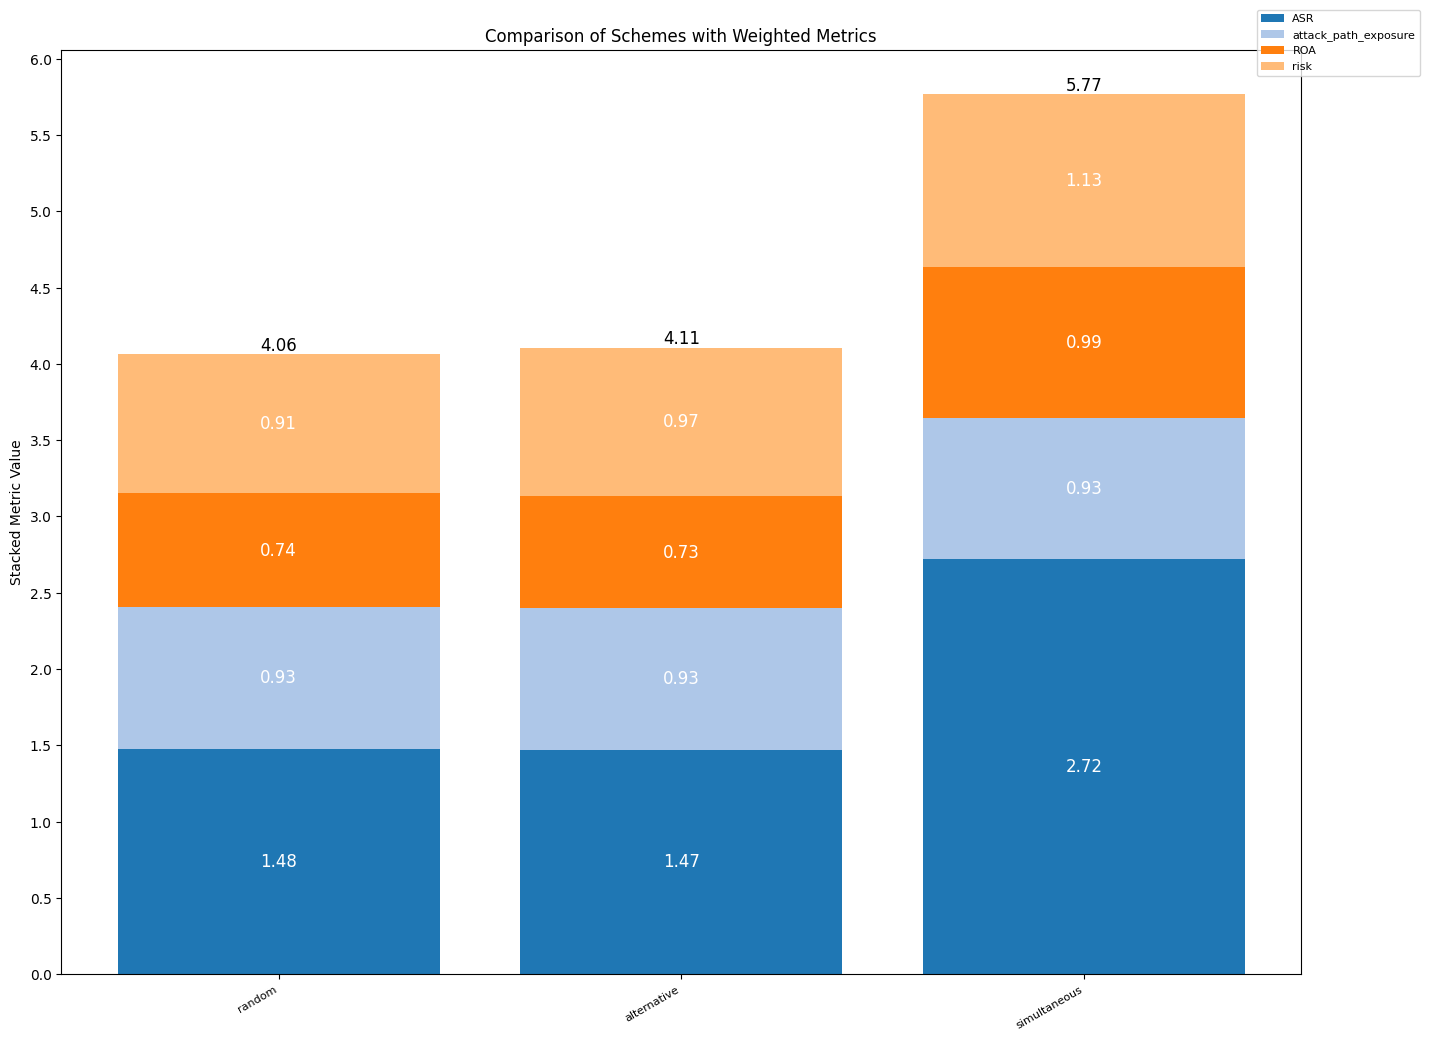

In [2523]:
chart.plot_n_schemes()

In [2524]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)
chart.process_weighted_metrics(data)

ASR  attack_path_exposure  \
all_features_CompleteTopologyShuffle           1.515148              2.215813   
all_features_IPShuffle                         1.701242              1.662832   
all_features_OSDiversity                       1.565375              2.594755   
all_features_ServiceDiversity                  1.537772              2.617528   
all_features                                   1.554173              2.502179   
hybrid_CompleteTopologyShuffle                 1.511779              2.246400   
hybrid_IPShuffle                               1.678982              1.675760   
hybrid_OSDiversity                             1.565805              2.733862   
hybrid_ServiceDiversity                        1.537456              2.613721   
hybrid                                         1.565514              2.420141   
host_compromise_ratio_CompleteTopologyShuffle  1.521732              2.244732   
host_compromise_ratio_IPShuffle                1.695819              1.685244   
host_compromise_ratio_OSDiversity              1.555937              2.693952   
host_compromise_ratio_ServiceDiversity         1.561459              2.612895   
host_compromise_ratio                          1.560992              2.488471   
attack_path_exposure_CompleteTopologyShuffle   1.507338              2.219979   
attack_path_exposure_IPShuffle                 1.671813              1.718310   
attack_path_exposure_OSDiversity               1.567292              2.684156   
attack_path_exposure_ServiceDiversity          1.536589              2.595667   
attack_path_exposure                           1.555705              2.428102   
overall_asr_avg_CompleteTopologyShuffle        1.526137              2.211664   
overall_asr_avg_IPShuffle                      1.698004              1.664760   
overall_asr_avg_OSDiversity                    1.556110              2.689045   
overall_asr_avg_ServiceDiversity               1.549325              2.612895   
overall_asr_avg                                1.557822              2.456382   
roa_CompleteTopologyShuffle                    1.519499              2.236797   
roa_IPShuffle                                  1.703685              1.713497   
roa_OSDiversity                                1.556409              2.664776   
roa_ServiceDiversity                           1.538298              2.624508   
roa                                            1.562087              2.494779   
risk_CompleteTopologyShuffle                   1.513912              2.231564   
risk_IPShuffle                                 1.695039              1.685542   
risk_OSDiversity                               1.567094              2.696412   
risk_ServiceDiversity                          1.544549              2.589975   
risk                                           1.548830              2.467158   
attack_stage_CompleteTopologyShuffle           1.519598              2.201417   
attack_stage_IPShuffle                         1.690309              1.706877   
attack_stage_OSDiversity                       1.562297              2.659974   
attack_stage_ServiceDiversity                  1.553936              2.624508   
attack_stage                                   1.563791              2.484433   
mtd_freq_CompleteTopologyShuffle               1.505669              2.257318   
mtd_freq_IPShuffle                             1.698219              1.694543   
mtd_freq_OSDiversity                           1.573337              2.686598   
mtd_freq_ServiceDiversity                      1.545041              2.589975   
mtd_freq                                       1.558641              2.481152   
overall_mttc_avg_CompleteTopologyShuffle       1.521054              2.211664   
overall_mttc_avg_IPShuffle                     1.705170              1.667041   
overall_mttc_avg_OSDiversity                   1.570945              2.689045   
overall_mttc_avg_ServiceDiversity              1.541962              2.592249   
ov

Standard deviation for each metric:
ASR                     0.061769
attack_path_exposure    0.360352
ROA                     0.084401
risk                    0.054349
dtype: float64

Overall 'sum' standard deviation: 0.42



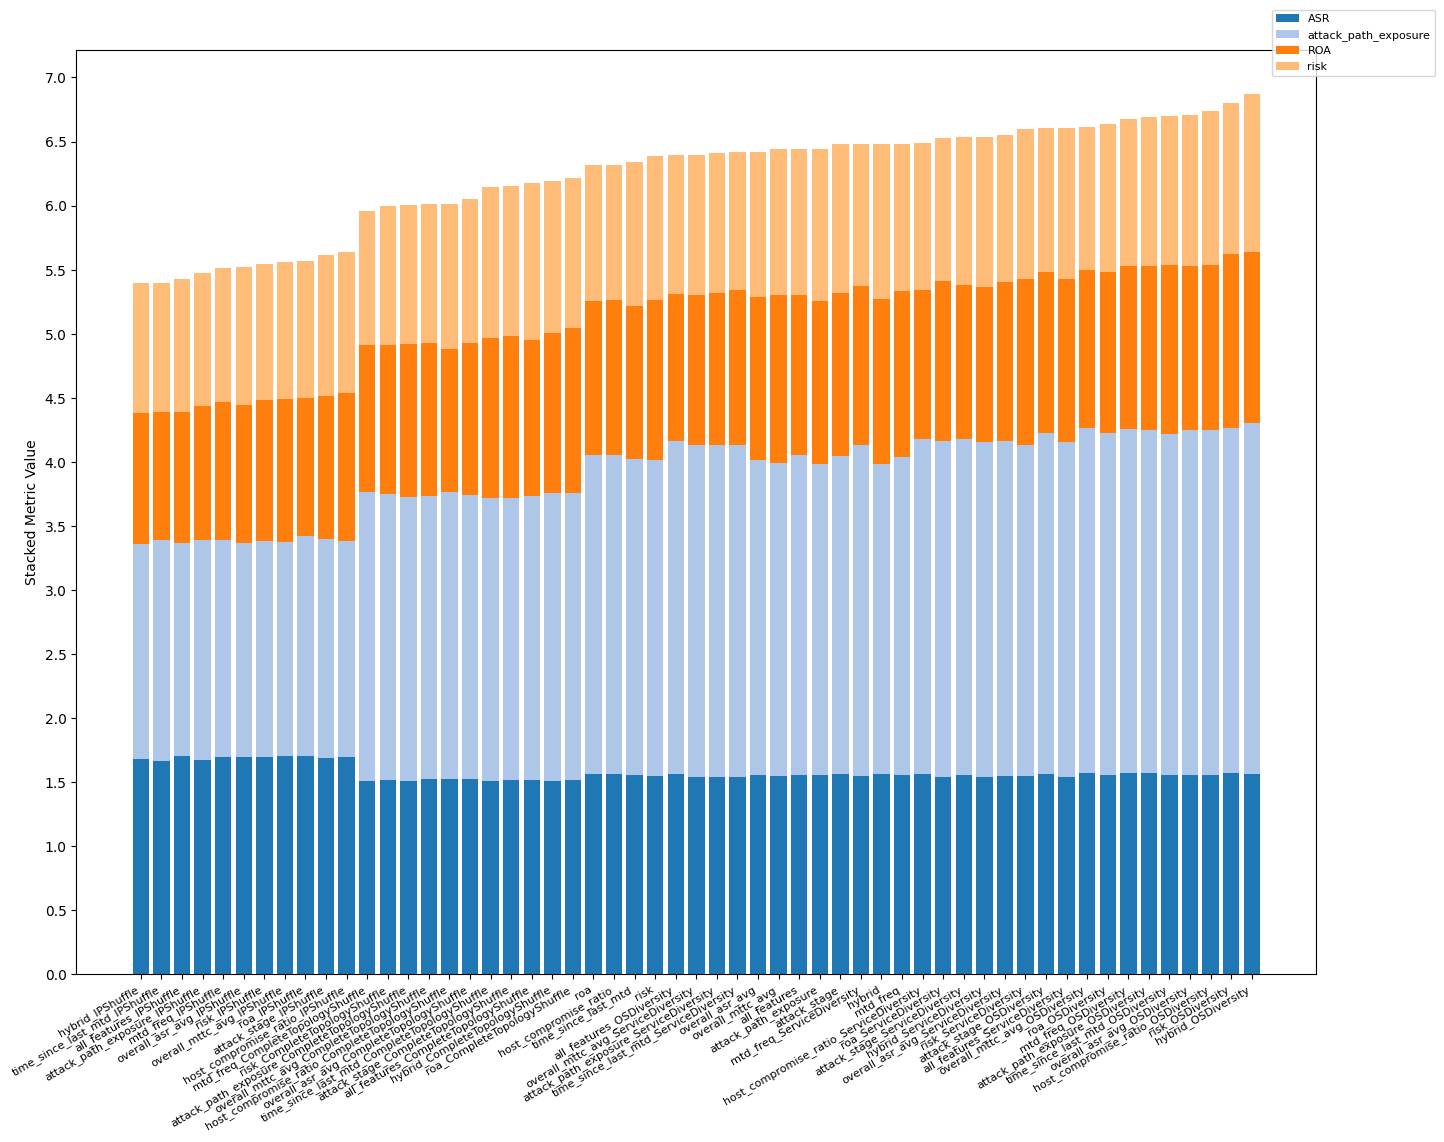

In [2525]:
chart.plot_n_schemes(name = "All models", title=None, show_numbers=False)

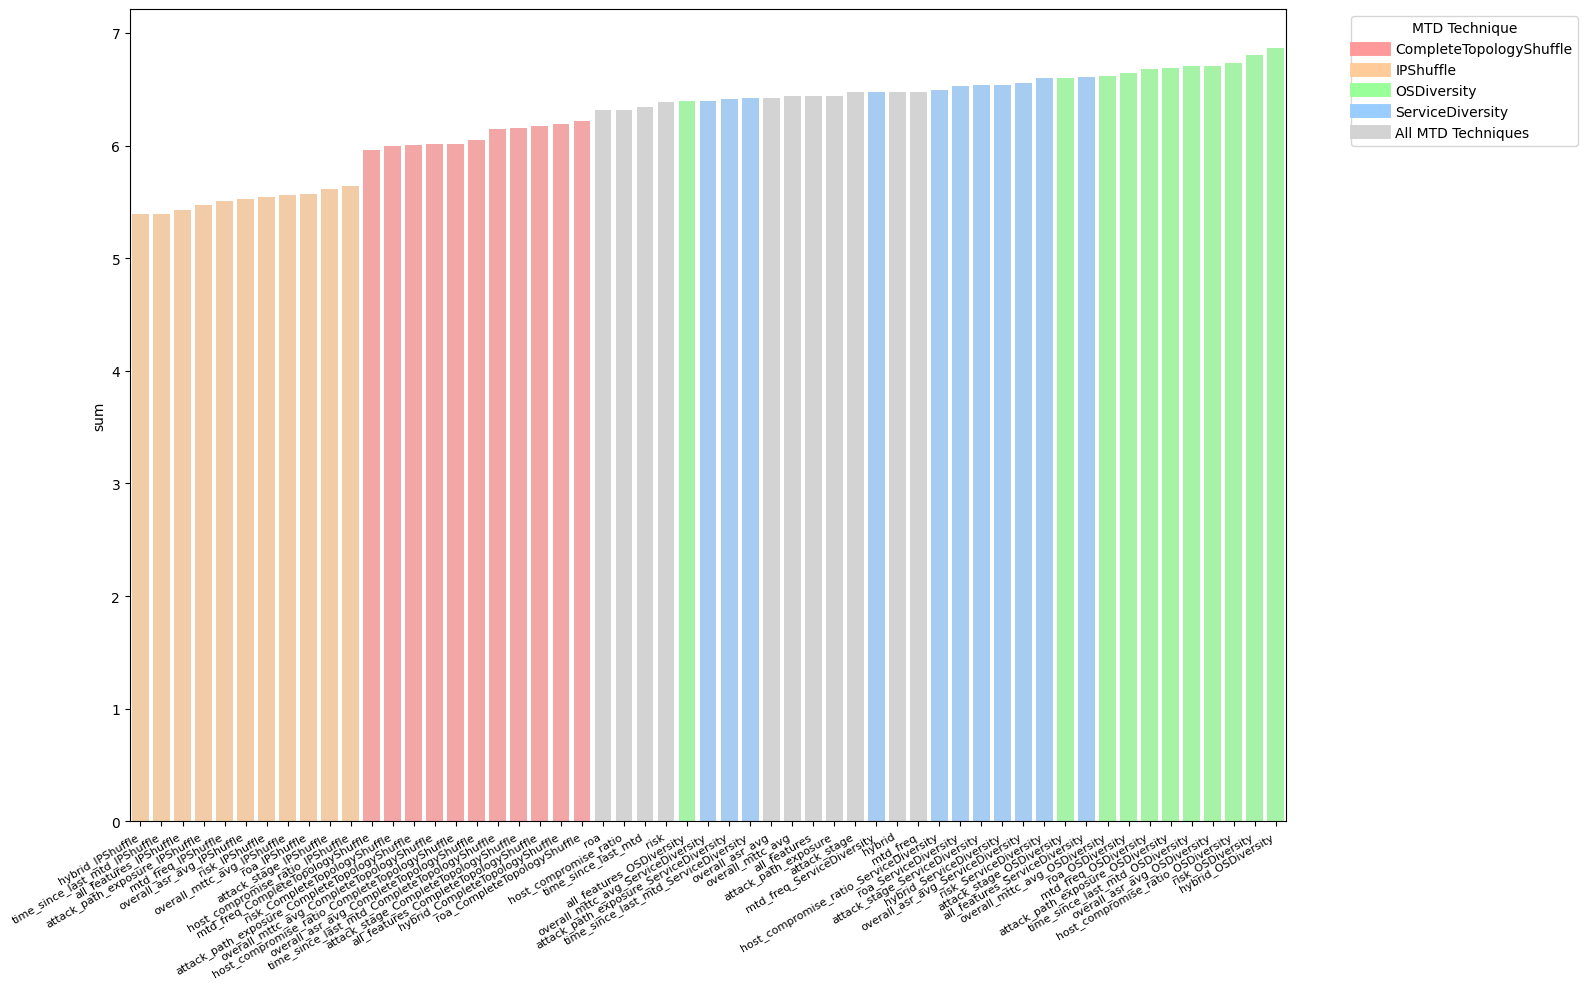

In [2526]:
chart.mtd_techniques_chart('sum')

In [2527]:
combined_data

all_features_CompleteTopologyShuffle  \
ASR                                               1.515148   
attack_path_exposure                              2.215813   
ROA                                               1.220719   
risk                                              1.222908   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.701242                  1.565375   
attack_path_exposure                1.662832                  2.594755   
ROA                                 1.021801                  1.148786   
risk                                1.037370                  1.084165   

                      all_features_ServiceDiversity  all_features  \
ASR                                        1.537772      1.554173   
attack_path_exposure                       2.617528      2.502179   
ROA                                        1.273370      1.249090   
risk                                       1.179738      1.137075   

                      hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
ASR                                         1.511779          1.678982   
attack_path_exposure                        2.246400          1.675760   
ROA                                         1.243449          1.025649   
risk                                        1.190047          1.013855   

                      hybrid_OSDiversity  hybrid_ServiceDiversity    hybrid  \
ASR                             1.565805                 1.537456  1.565514   
attack_path_exposure            2.733862                 2.613721  2.420141   
ROA                             1.334288                 1.211483  1.286312   
risk                            1.234803                 1.173645  1.207306   

                      ...  overall_mttc_avg_ServiceDiversity  \
ASR                   ...                           1.541962   
attack_path_exposure  ...                           2.592249   
ROA                   ...                           1.170356   
risk                  ...                           1.089403   

                      overall_mttc_avg  \
ASR                           1.550013   
attack_path_exposure          2.440142   
ROA                           1.310078   
risk                          1.140506   

                      time_since_last_mtd_CompleteTopologyShuffle  \
ASR                                                      1.508145   
attack_path_exposure                                     2.211664   
ROA                                                      1.246372   
risk                                                     1.179879   

                      time_since_last_mtd_IPShuffle  \
ASR                                        1.663715   
attack_path_exposure                       1.722391   
ROA                                        1.002880   
risk                                       1.005583   

                      time_since_last_mtd_OSDiversity  \
ASR                                          1.555809   
attack_path_exposure                         2.659974   
ROA                                          1.317353   
risk                                         1.169323   

                      time_since_last_mtd_ServiceDiversity  \
ASR                                               1.539686   
attack_path_exposure                              2.589975   
ROA                                               1.213557   
risk                                              1.074634   

                      time_since_last_mtd  simultaneous    random  alternative  
ASR                              1.559208      2.718747  1.478246     1.472455  
attack_path_exposure             2.460476      0.928564  0.928938     0.926660  
ROA                              1.197624      0.986561  0.743996     0.734480  
risk                             1.124309      1.134298  0.912069     0.973734  

[4 rows x 58 columns]

In [2528]:
# chart.plot_n_schemes(show_numbers=False)

In [2529]:
data = chart.weighted_data.T

Standard deviation for each metric:
ASR                     0.073197
attack_path_exposure    0.399974
ROA                     0.101381
risk                    0.073844
dtype: float64

Overall 'sum' standard deviation: 2.35



<Figure size 1600x1200 with 0 Axes>

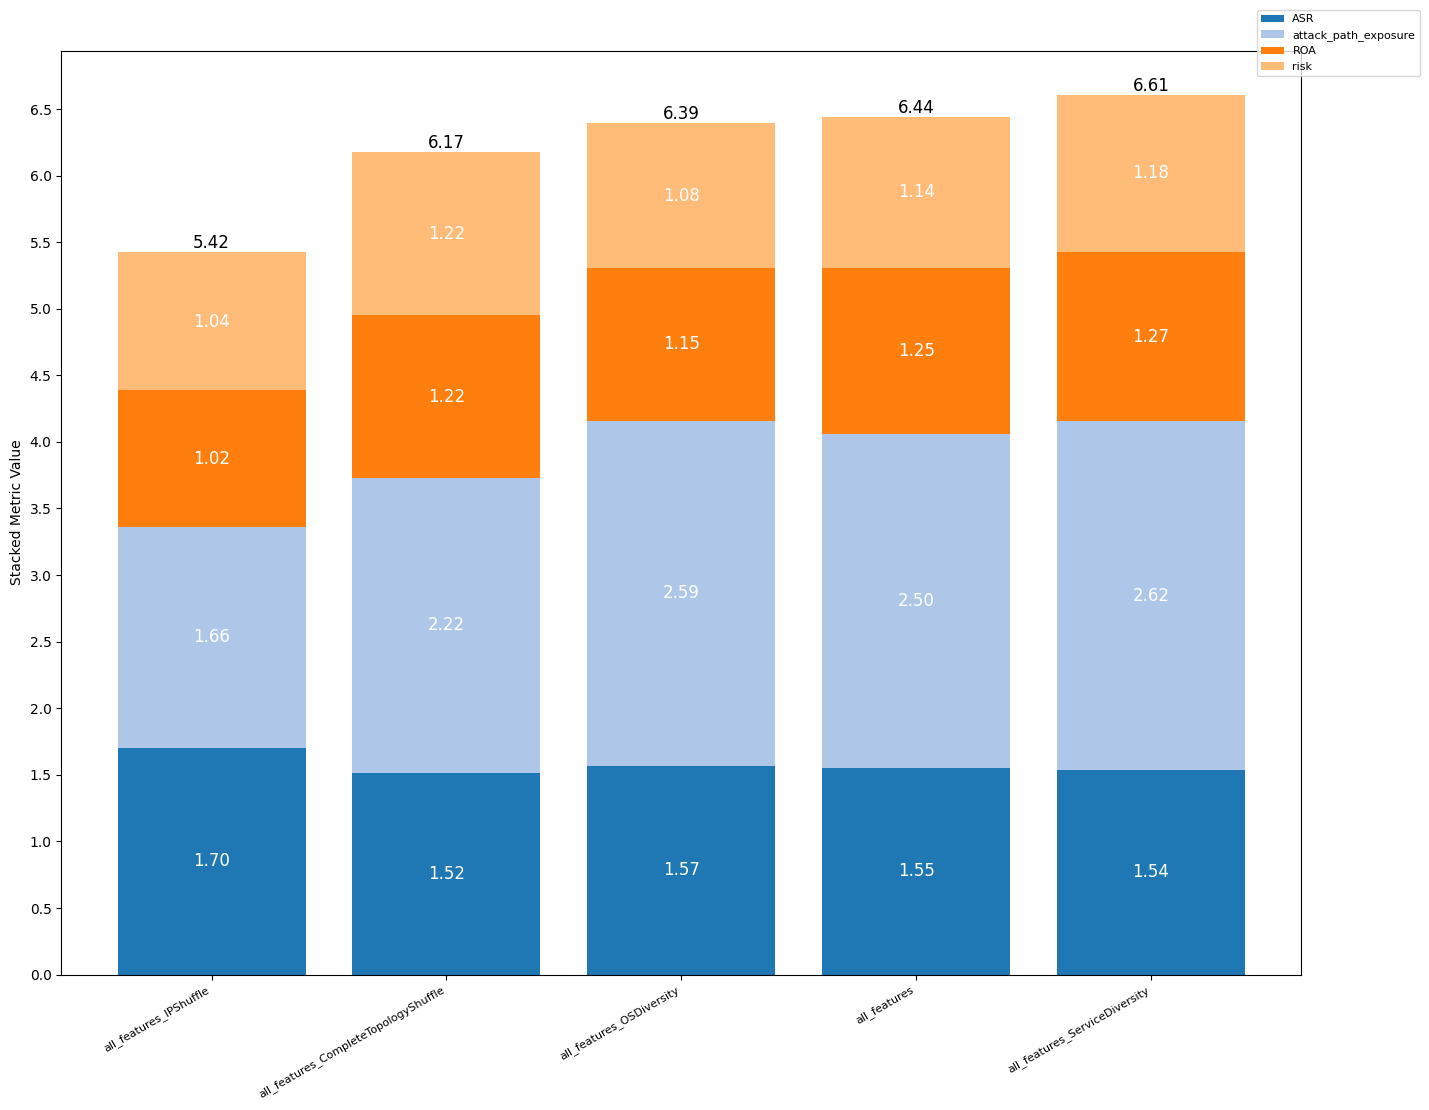

Standard deviation for each metric:
ASR                     0.063924
attack_path_exposure    0.414255
ROA                     0.118167
risk                    0.086896
dtype: float64

Overall 'sum' standard deviation: 2.81



<Figure size 1600x1200 with 0 Axes>

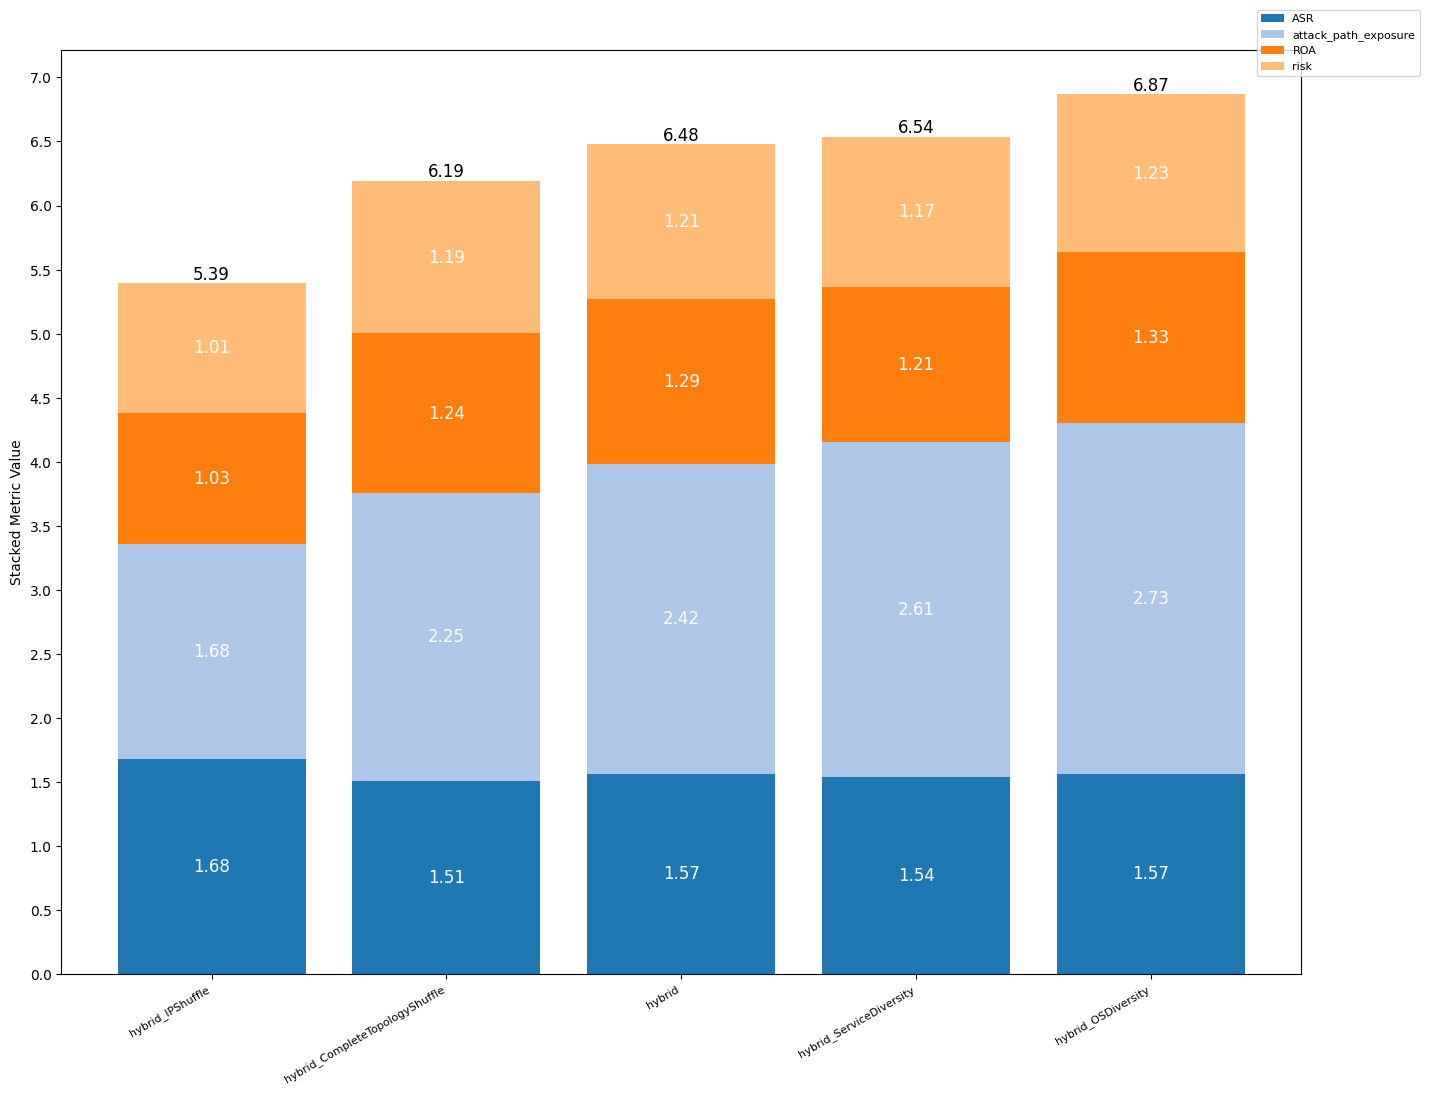

Standard deviation for each metric:
ASR                     0.067249
attack_path_exposure    0.406033
ROA                     0.066167
risk                    0.051970
dtype: float64

Overall 'sum' standard deviation: 2.15



<Figure size 1600x1200 with 0 Axes>

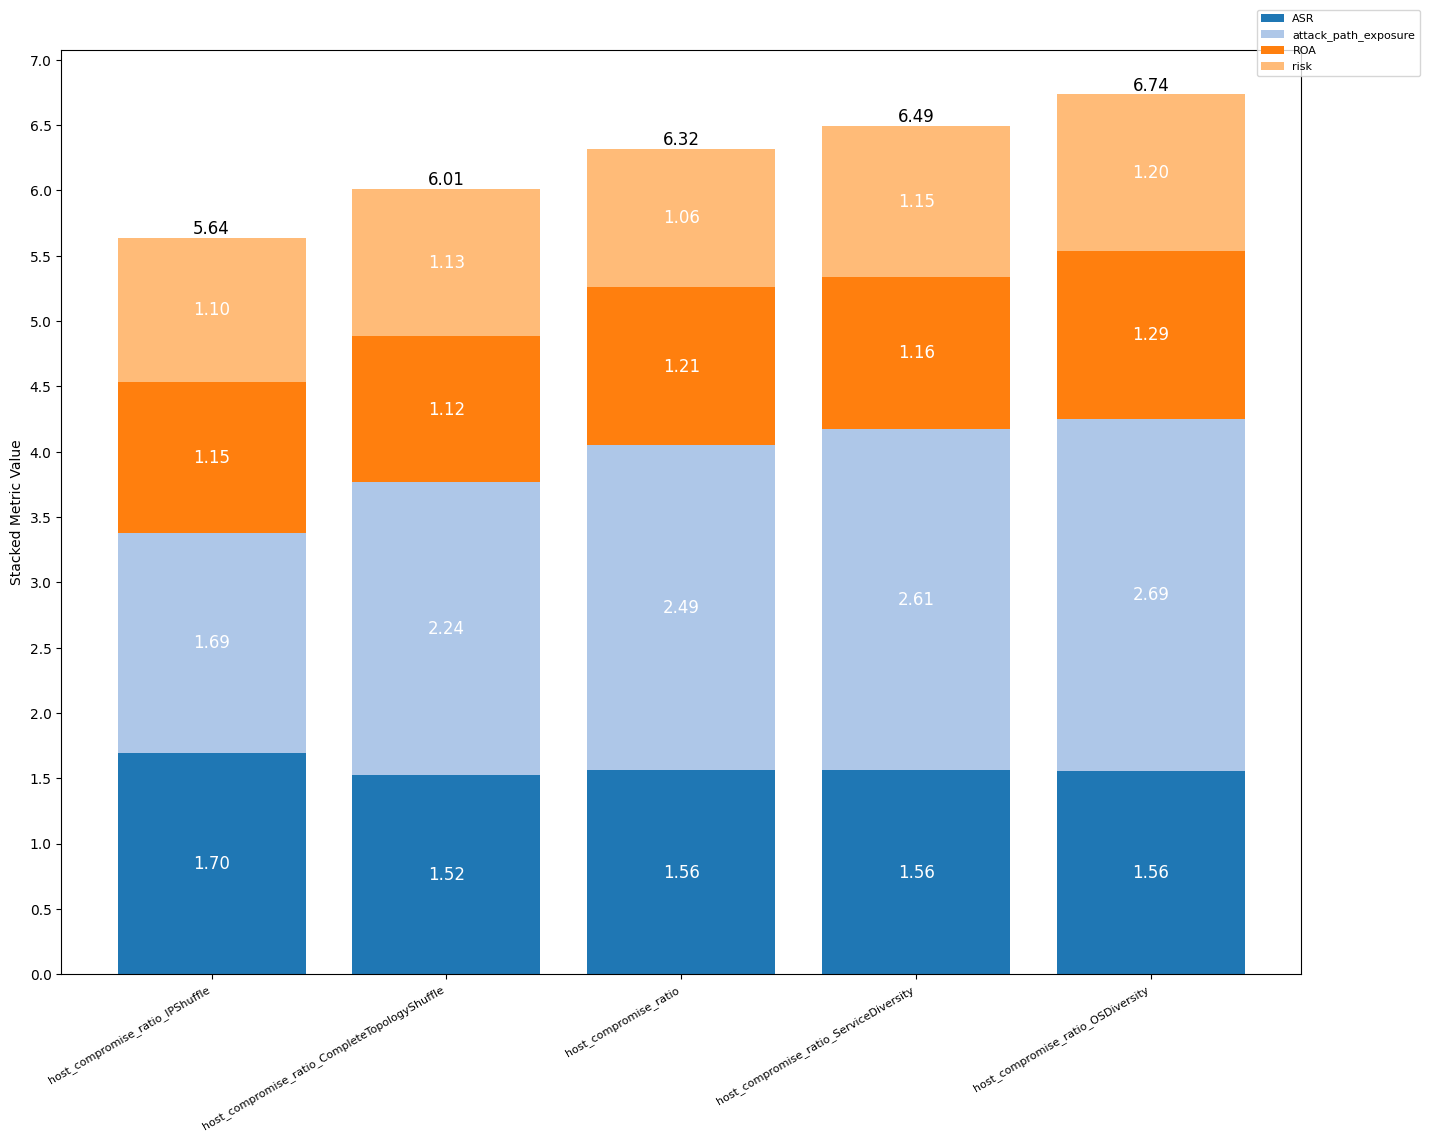

Standard deviation for each metric:
ASR                     0.062440
attack_path_exposure    0.384674
ROA                     0.093577
risk                    0.061287
dtype: float64

Overall 'sum' standard deviation: 2.41



<Figure size 1600x1200 with 0 Axes>

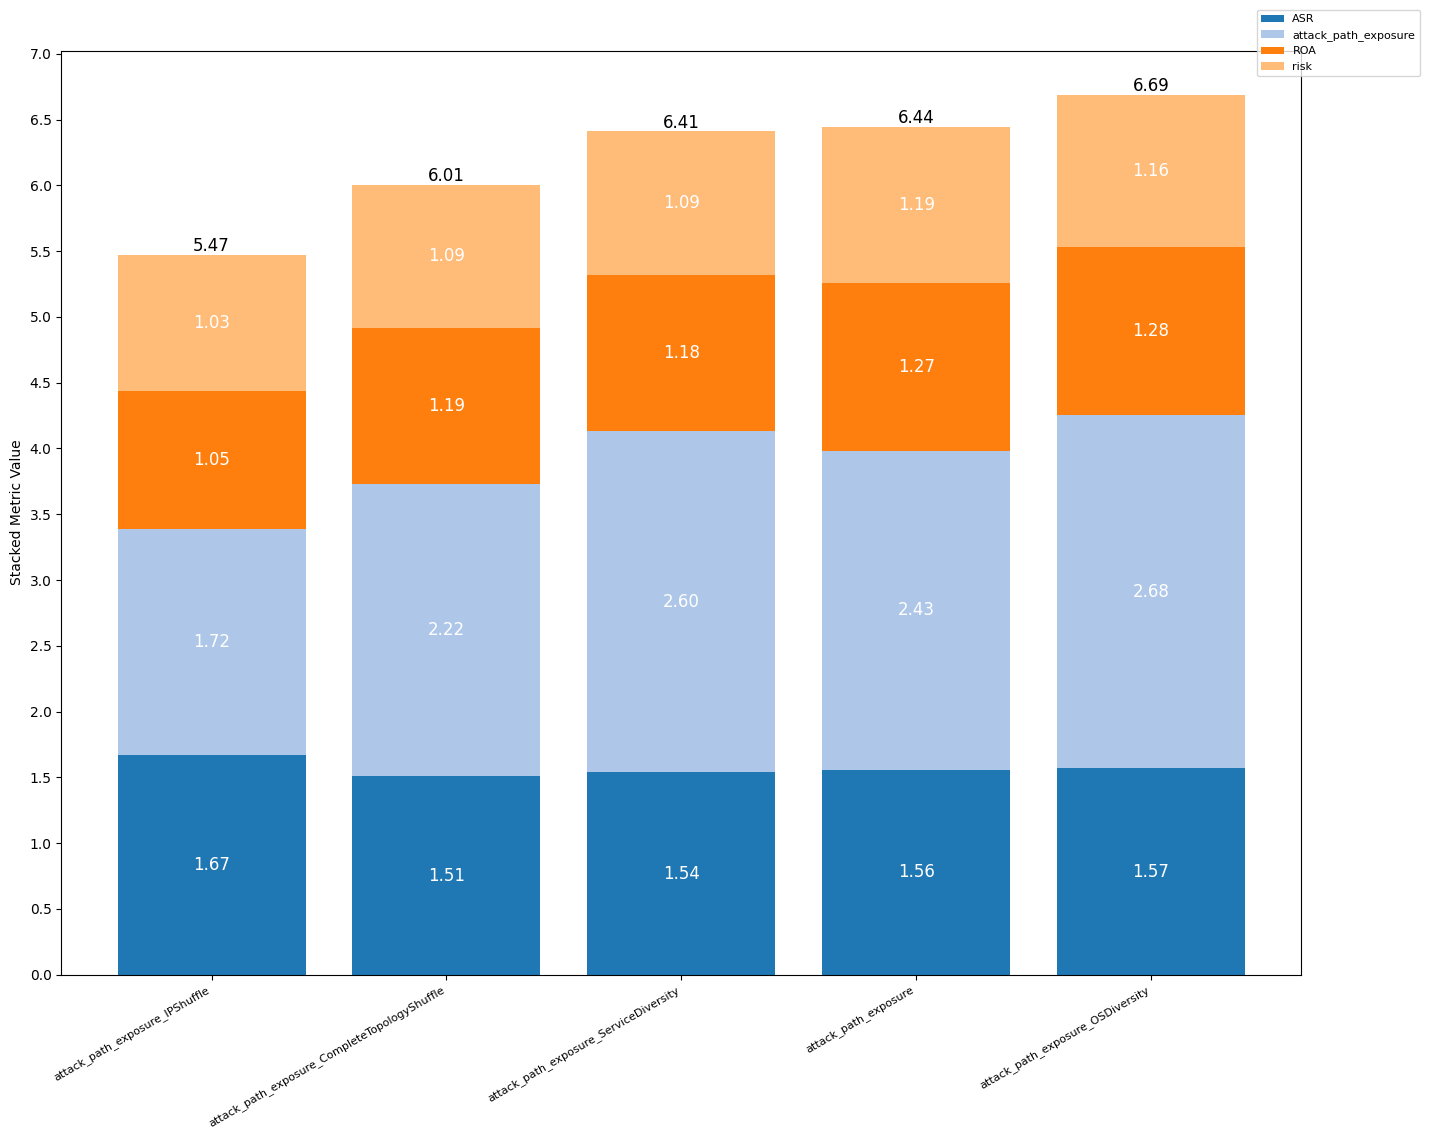

Standard deviation for each metric:
ASR                     0.068553
attack_path_exposure    0.412740
ROA                     0.084435
risk                    0.035068
dtype: float64

Overall 'sum' standard deviation: 2.39



<Figure size 1600x1200 with 0 Axes>

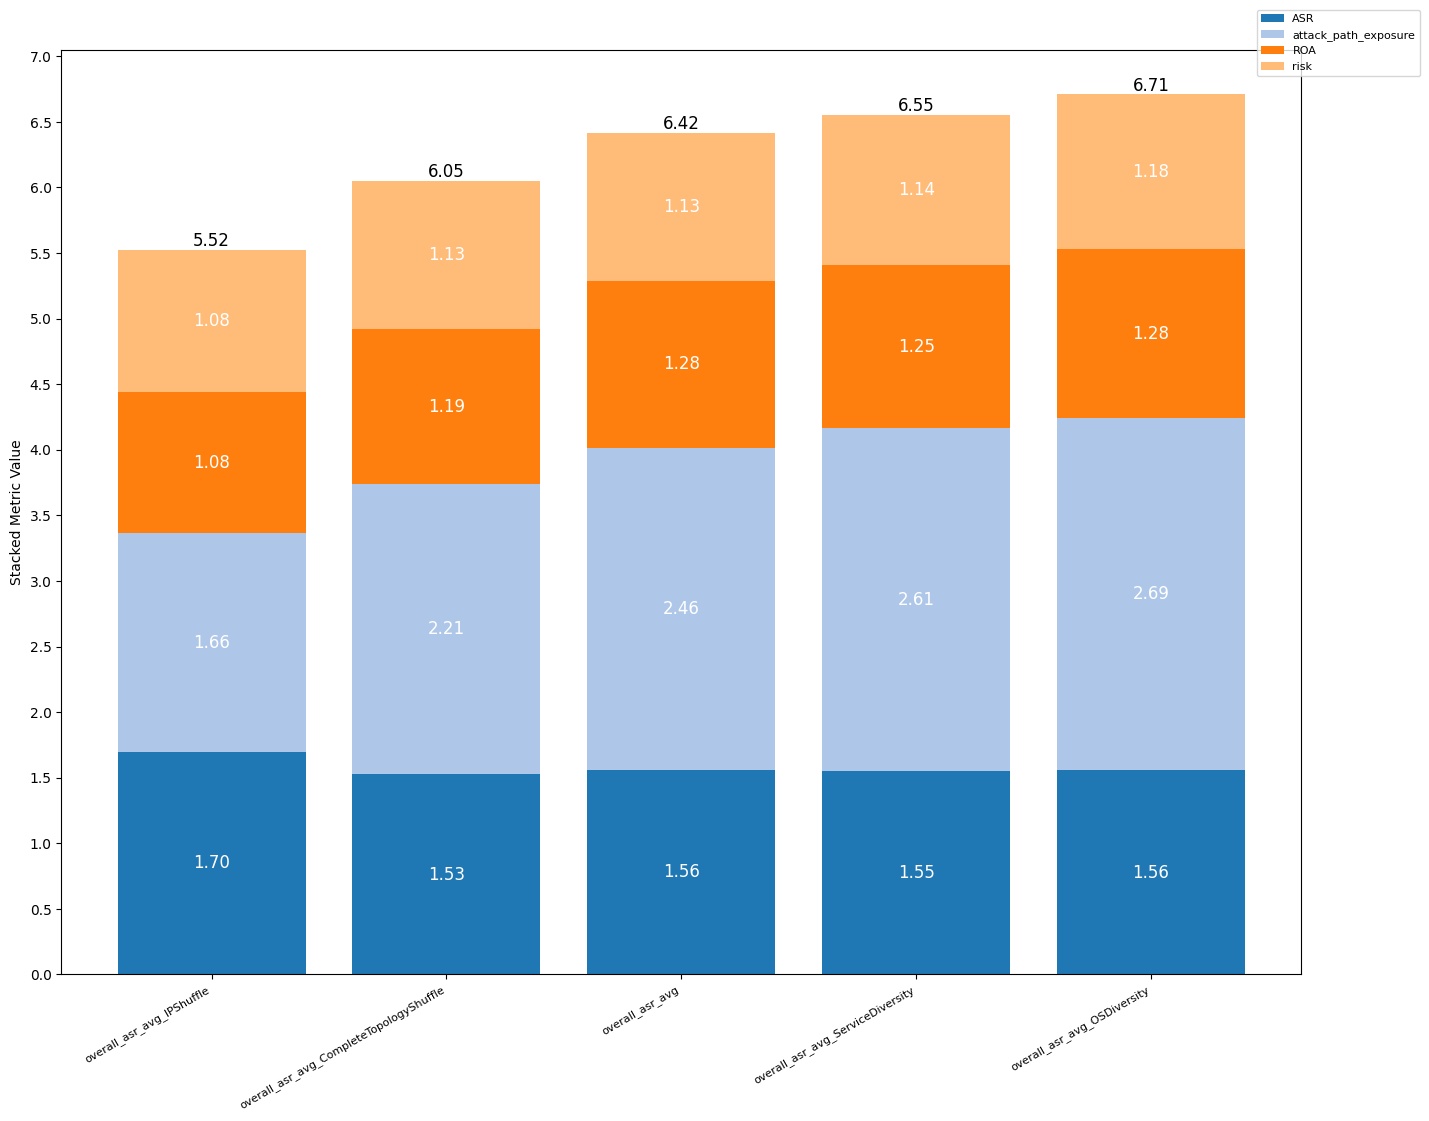

Standard deviation for each metric:
ASR                     0.073305
attack_path_exposure    0.391568
ROA                     0.080619
risk                    0.051574
dtype: float64

Overall 'sum' standard deviation: 2.11



<Figure size 1600x1200 with 0 Axes>

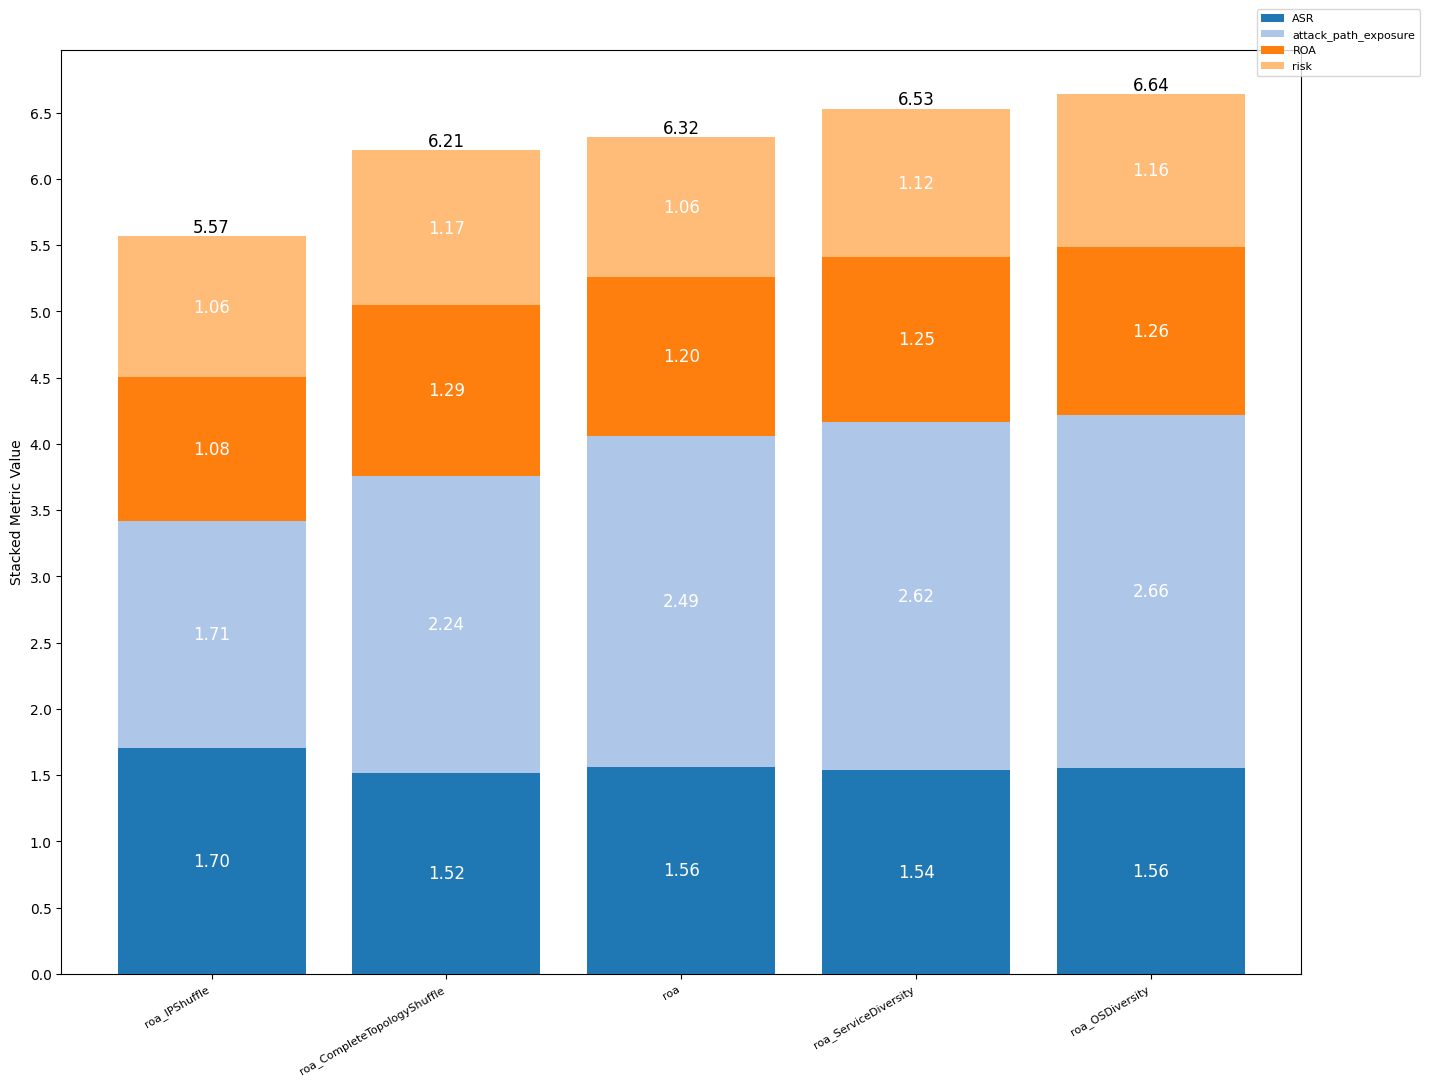

Standard deviation for each metric:
ASR                     0.070373
attack_path_exposure    0.401742
ROA                     0.103142
risk                    0.052055
dtype: float64

Overall 'sum' standard deviation: 2.53



<Figure size 1600x1200 with 0 Axes>

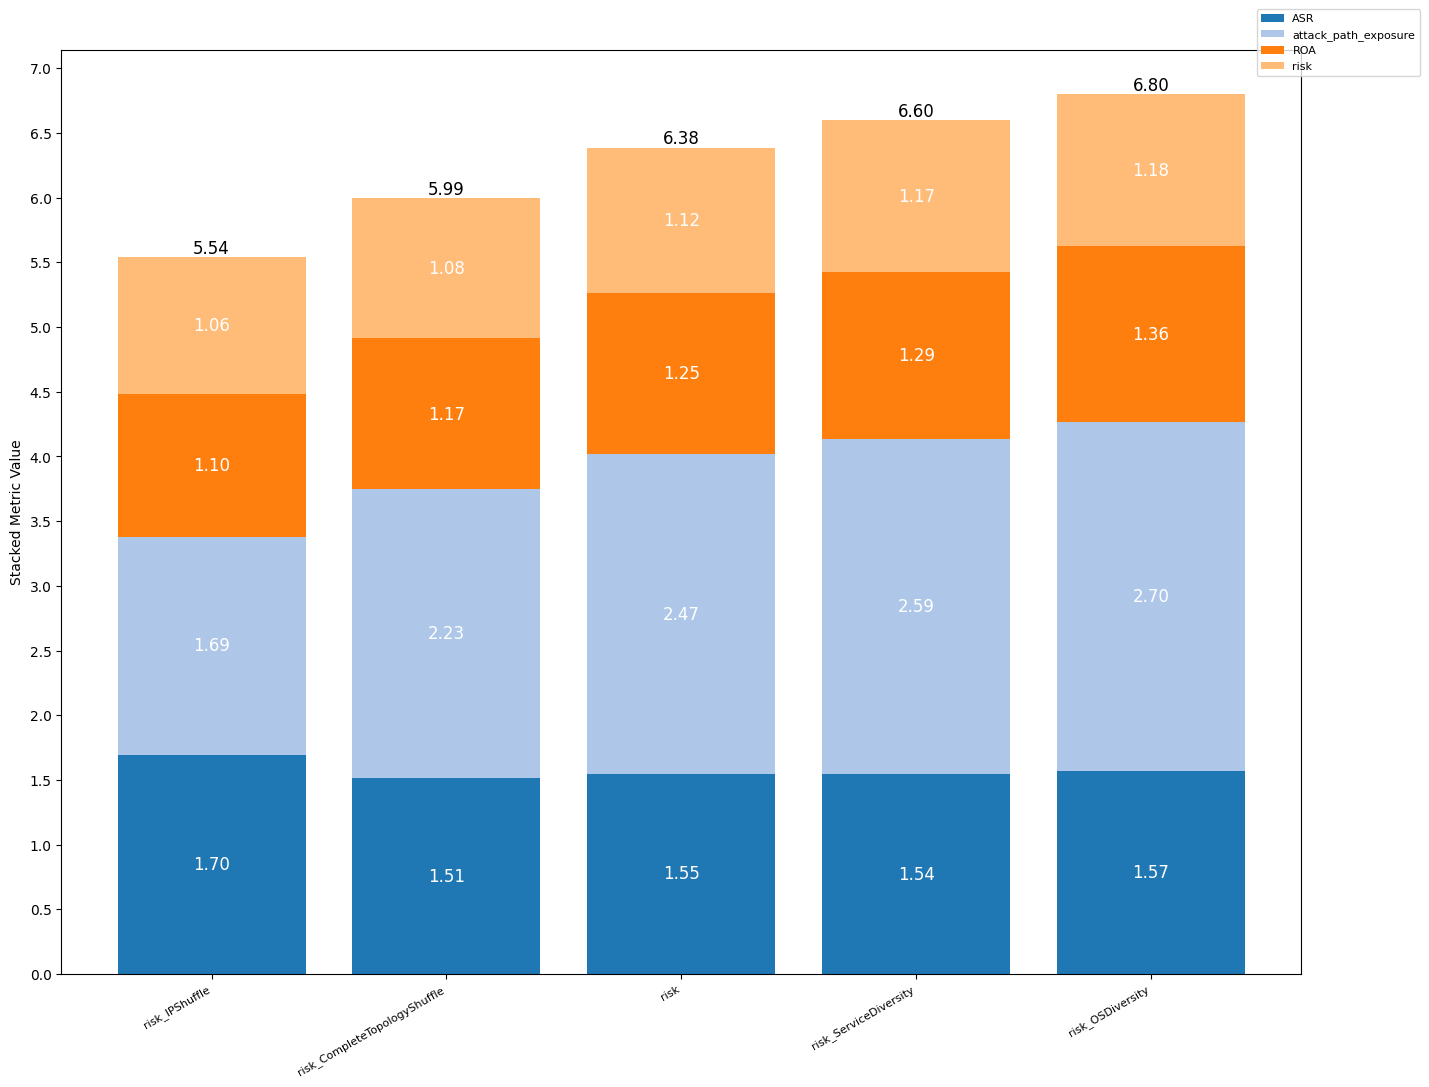

Standard deviation for each metric:
ASR                     0.065291
attack_path_exposure    0.395011
ROA                     0.064132
risk                    0.028885
dtype: float64

Overall 'sum' standard deviation: 2.06



<Figure size 1600x1200 with 0 Axes>

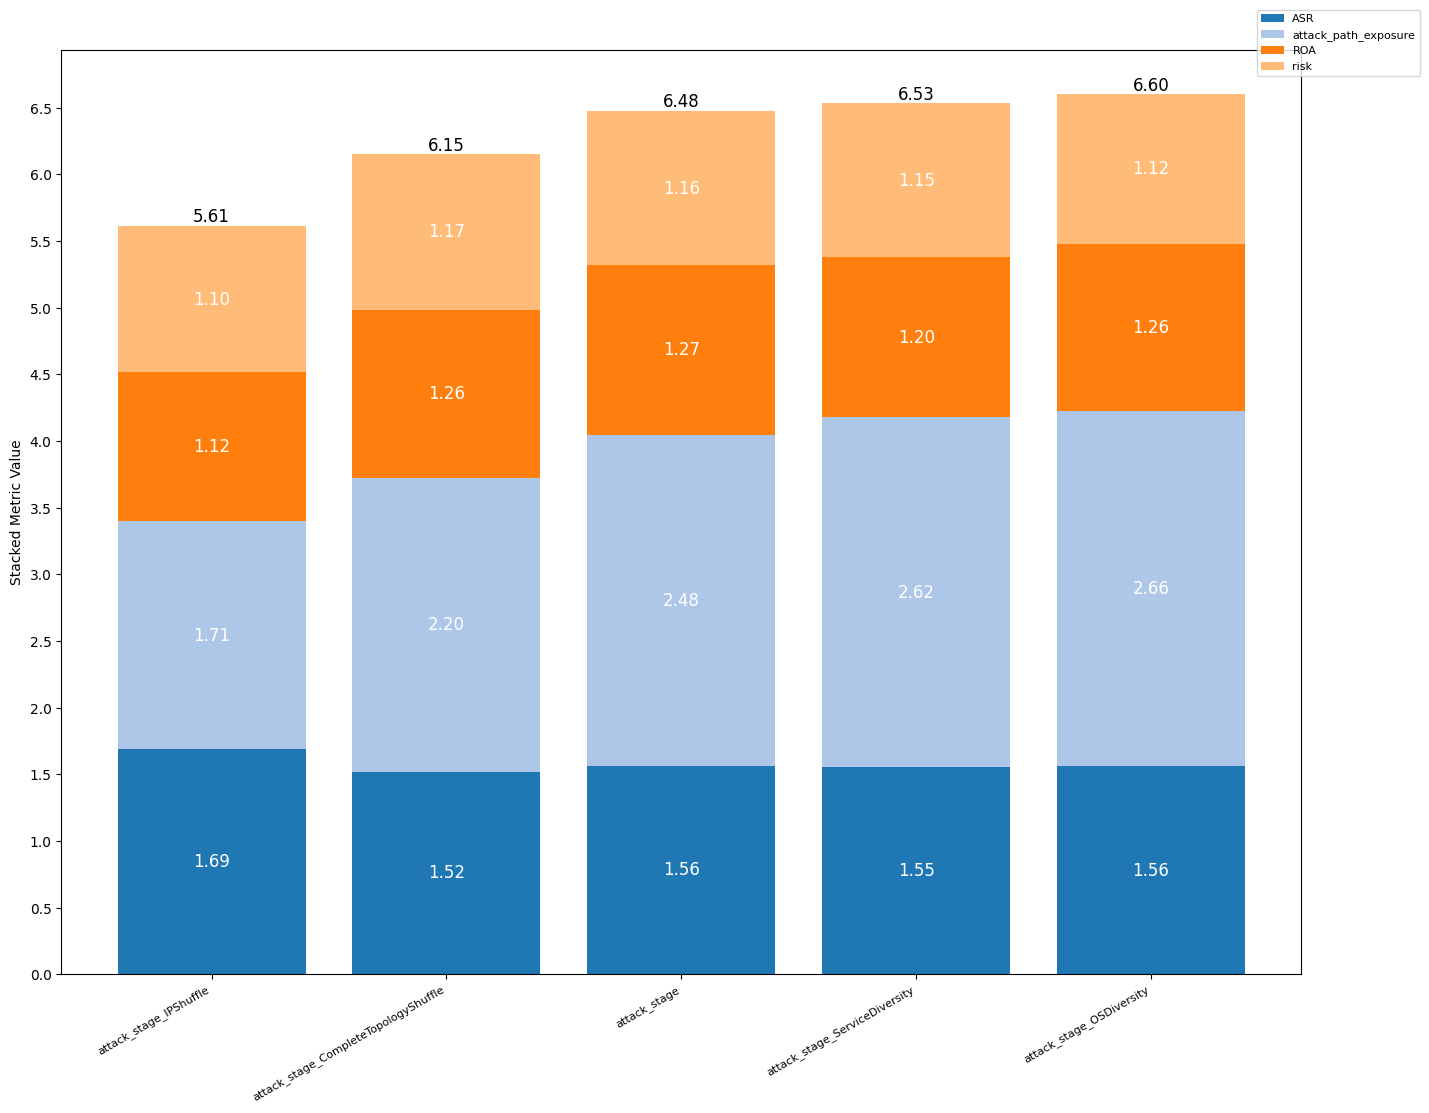

Standard deviation for each metric:
ASR                     0.072716
attack_path_exposure    0.395593
ROA                     0.090773
risk                    0.050572
dtype: float64

Overall 'sum' standard deviation: 2.41



<Figure size 1600x1200 with 0 Axes>

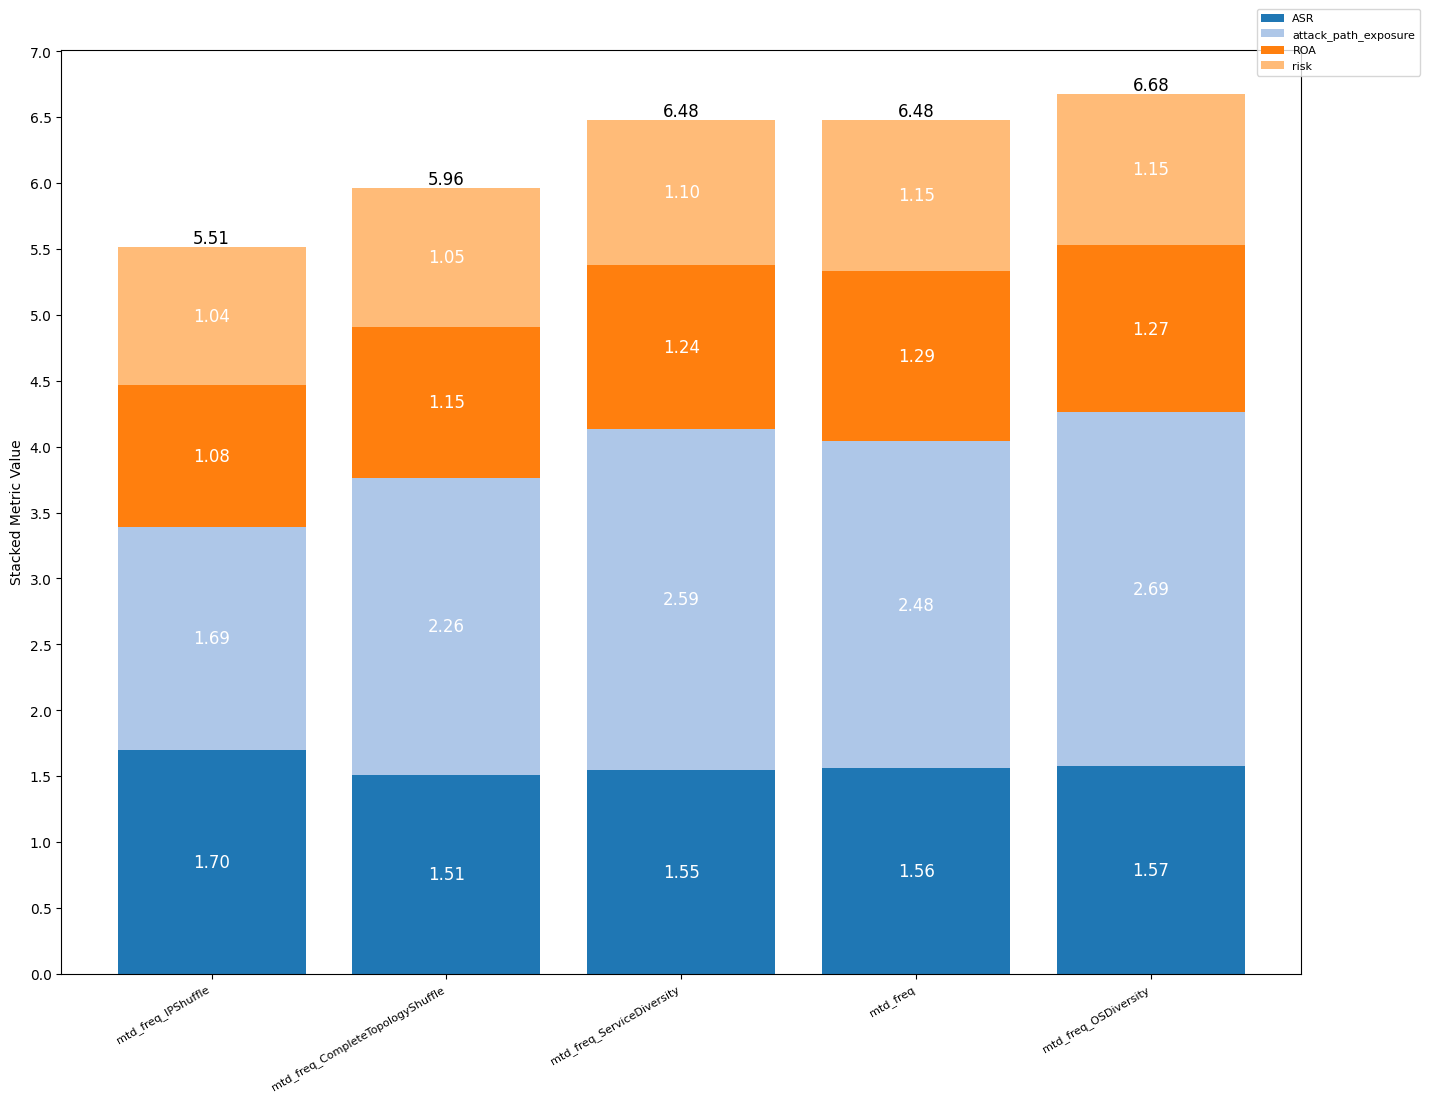

Standard deviation for each metric:
ASR                     0.073394
attack_path_exposure    0.407075
ROA                     0.072368
risk                    0.027951
dtype: float64

Overall 'sum' standard deviation: 2.12



<Figure size 1600x1200 with 0 Axes>

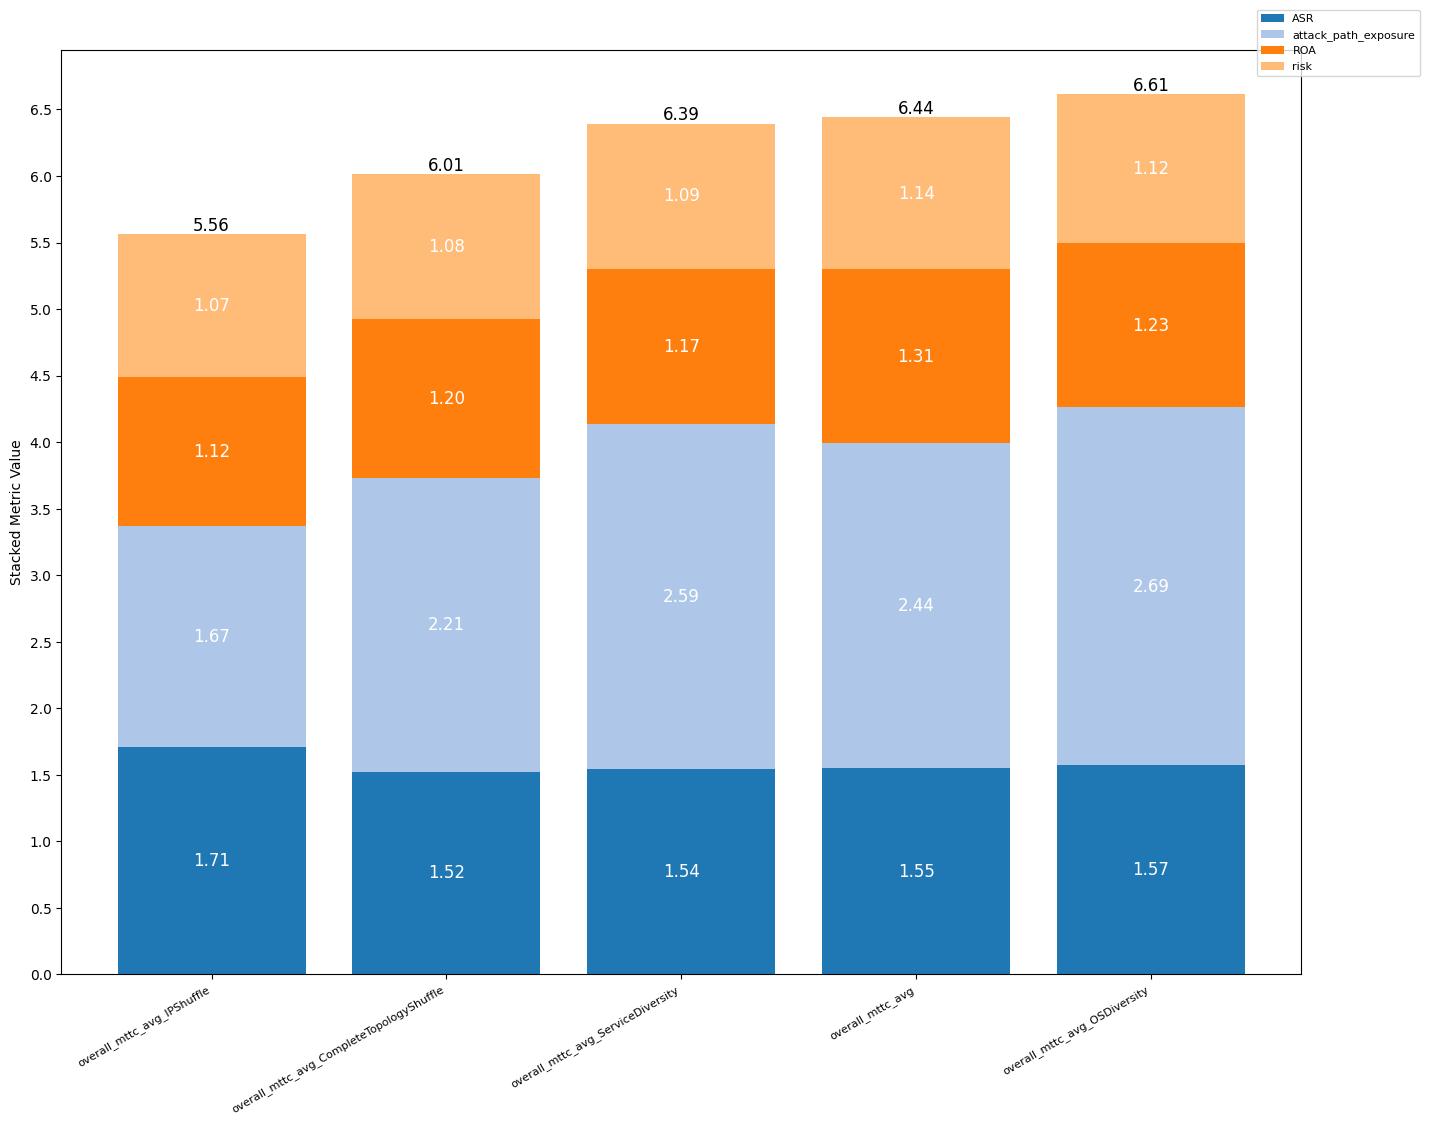

Standard deviation for each metric:
ASR                     0.058599
attack_path_exposure    0.379697
ROA                     0.117121
risk                    0.072038
dtype: float64

Overall 'sum' standard deviation: 2.48



<Figure size 1600x1200 with 0 Axes>

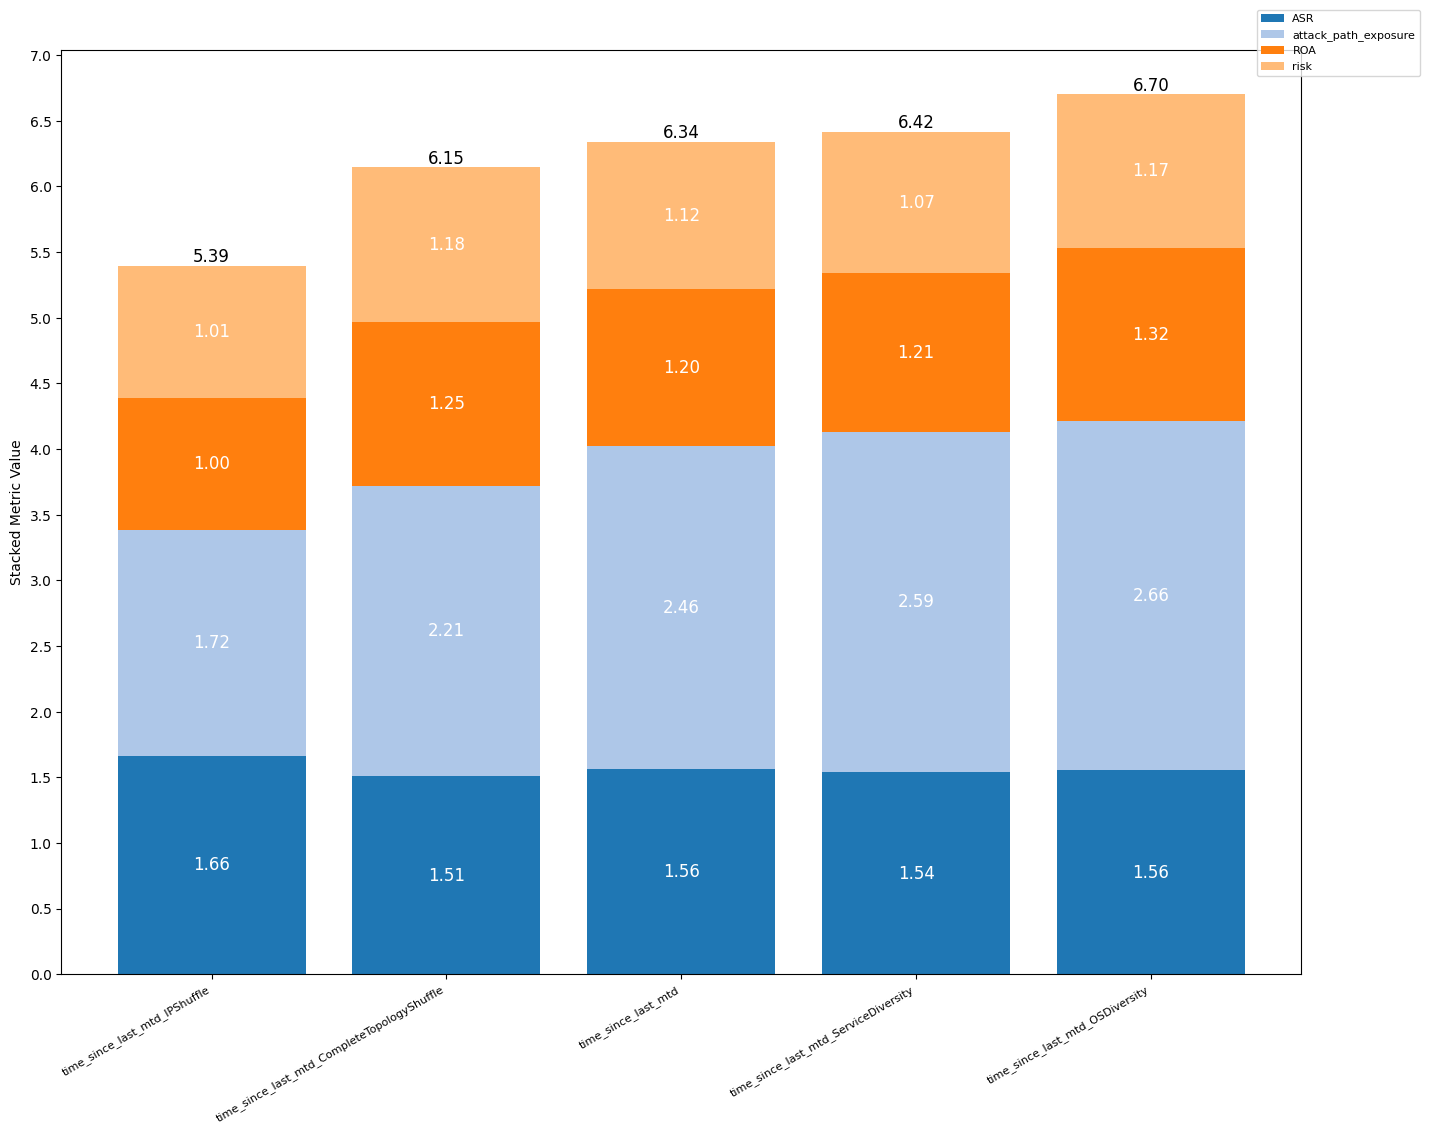

In [2530]:

for metric in metrics:  
    data_copy = data
    metric_data = data_copy.filter(regex=metric)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = metric, title=None)
    
    # Show the plot for the current metric
    plt.show()




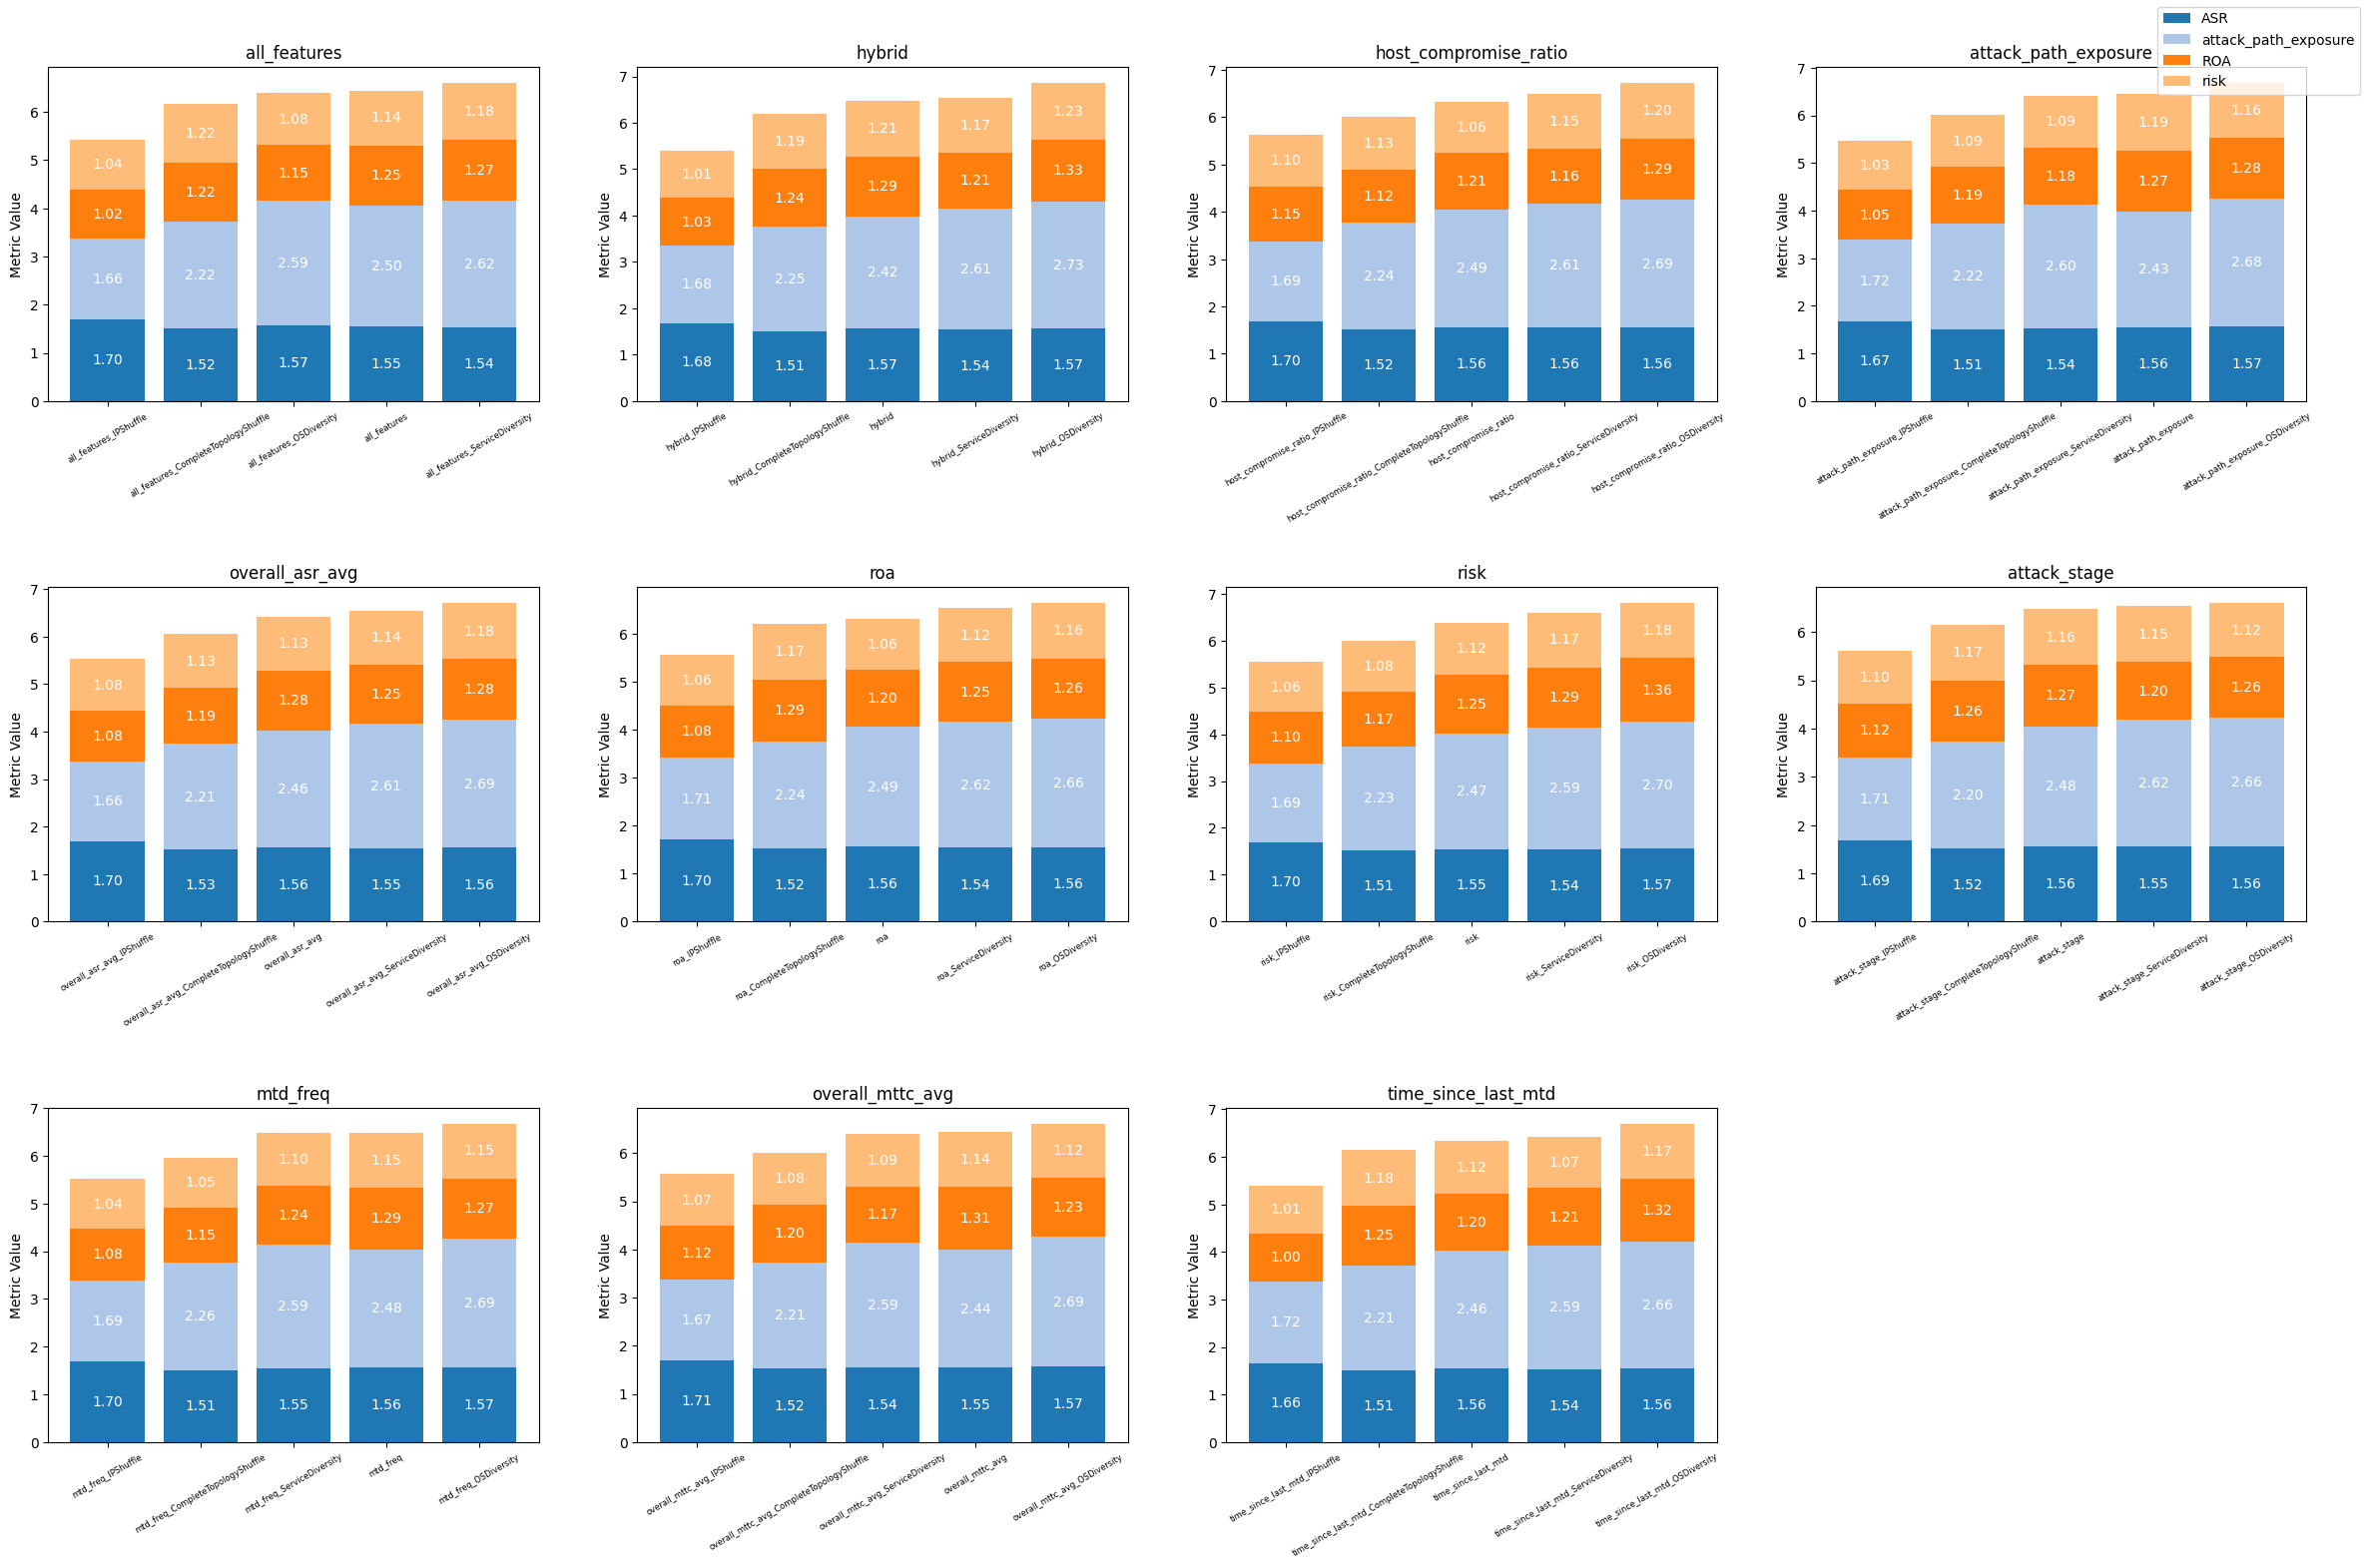

In [2531]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the subplots (3 columns and 4 rows)
num_metrics = len(metrics)
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))  # Larger figsize for better visibility

# Flatten axes array for easy indexing
axes = axes.flatten()

# Iterate over each metric to create a stacked bar plot
for idx, metric in enumerate(metrics):
    if idx < len(axes):  # Check to avoid out-of-bounds error
        data_copy = data

        metric_data = data_copy.filter(regex=metric).T.sort_values(by='sum').T
        metric_data = metric_data.drop(["sum", 'zscore', 'minmax']).T  # Filter data for the current metric

        # Assuming 'metric_data' is in the correct format for plotting
        metric_names = metric_data.columns  # Extract metric names
        values = metric_data.values  # Extract values to plot

        # Create a stacked bar plot
        bottom = np.zeros(len(metric_data))  # Initialize bottom to stack bars
        colors = plt.cm.tab20.colors  # Get colors for each metric

        for i, metric_name in enumerate(metric_names):
            bars = axes[idx].bar(metric_data.index, values[:, i], label=metric_name, color=colors[i % len(colors)], bottom=bottom)
            
            # Annotate the bars with the value
            for j, bar in enumerate(bars):
                height = bar.get_height()
                axes[idx].text(bar.get_x() + bar.get_width() / 2., bottom[j] + height / 2, 
                               f'{height:.2f}', ha='center', va='center', fontsize=10, color='white')
            
            bottom += values[:, i]  # Update bottom for stacking

        # Add labels and title for each subplot
        axes[idx].set_ylabel('Metric Value', fontsize=10)
        axes[idx].set_title(f'{metric}', fontsize=12)

        # Rotate the x-axis labels by 30 degrees for better readability
        axes[idx].tick_params(axis='x', rotation=30)
        axes[idx].set_xticklabels(metric_data.index, fontsize=6)  # Set smaller font size for x-axis labels

# Hide any remaining unused subplots
for i in range(num_metrics, len(axes)):
    fig.delaxes(axes[i])

# Create a single legend for all subplots and place it at the top-right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)  # Adjust bbox_to_anchor for space

# Adjust layout for more gaps between plots
plt.tight_layout(pad=3.0)  # Increase pad to create more space
plt.savefig("individual.png")
plt.show()


In [2532]:
mtd_schemes = ["CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity"
    ]

Standard deviation for each metric:
ASR                     0.006704
attack_path_exposure    0.018043
ROA                     0.052178
risk                    0.054689
dtype: float64

Overall 'sum' standard deviation: 0.47



<Figure size 1600x1200 with 0 Axes>

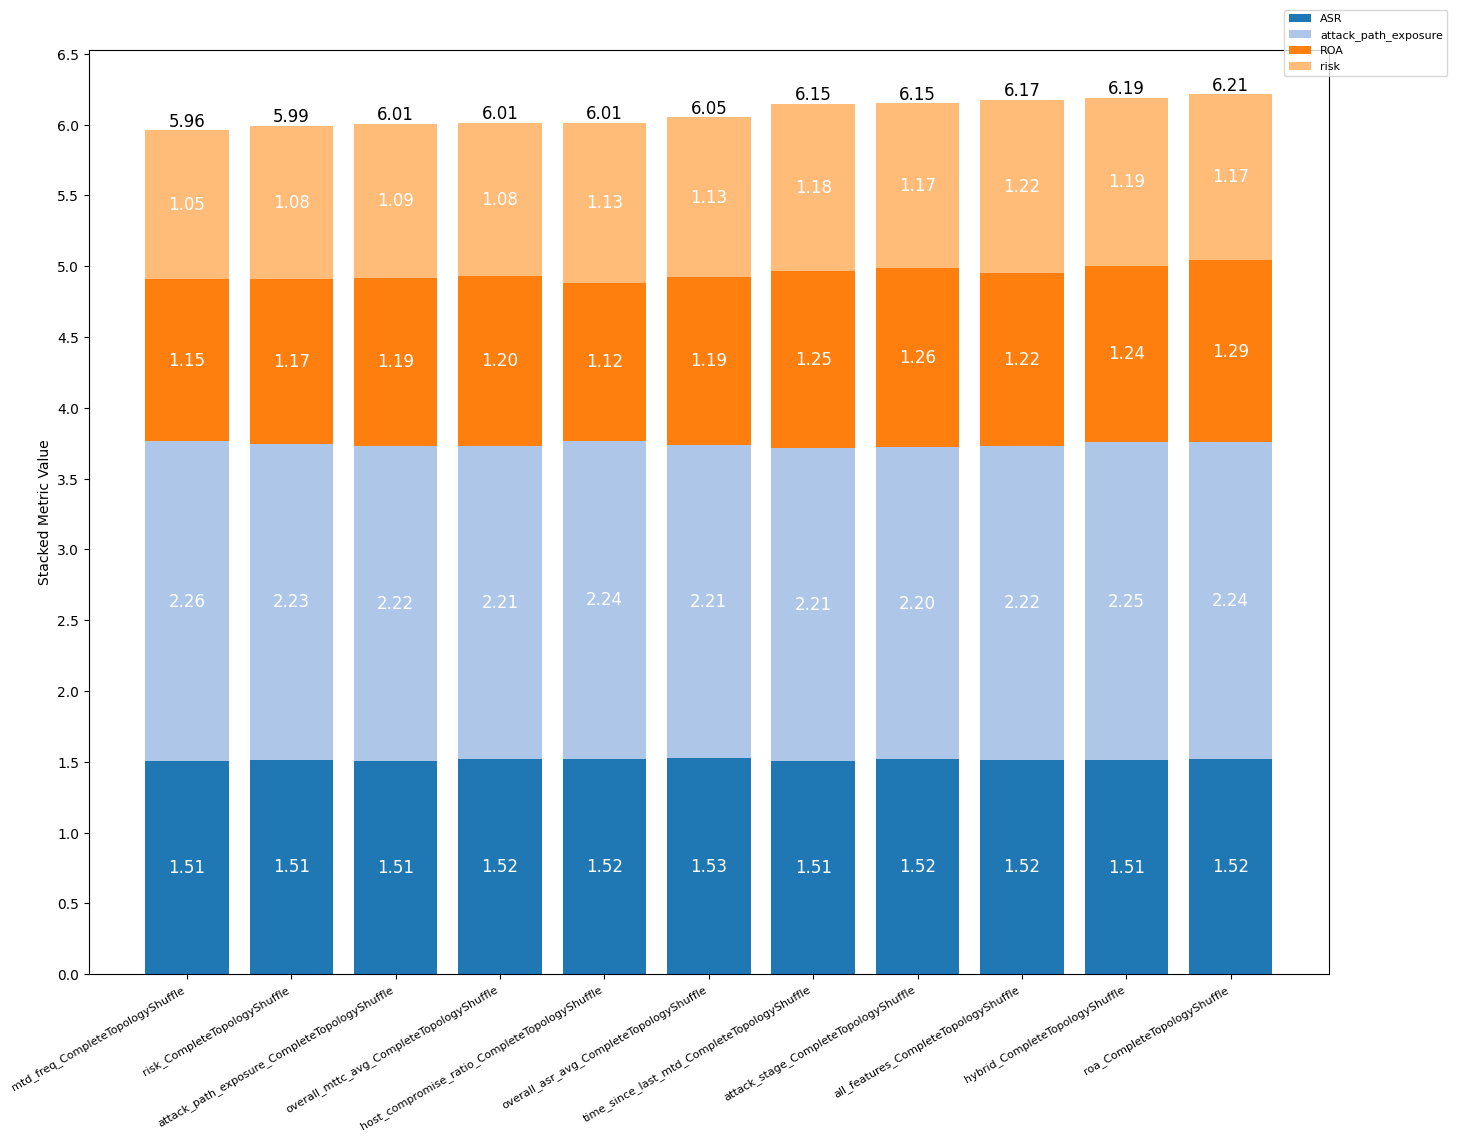

Index(['all_features_CompleteTopologyShuffle',
       'hybrid_CompleteTopologyShuffle',
       'host_compromise_ratio_CompleteTopologyShuffle',
       'attack_path_exposure_CompleteTopologyShuffle',
       'overall_asr_avg_CompleteTopologyShuffle',
       'roa_CompleteTopologyShuffle', 'risk_CompleteTopologyShuffle',
       'attack_stage_CompleteTopologyShuffle',
       'mtd_freq_CompleteTopologyShuffle',
       'overall_mttc_avg_CompleteTopologyShuffle',
       'time_since_last_mtd_CompleteTopologyShuffle'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

Standard deviation for each metric:
ASR                     0.013655
attack_path_exposure    0.022026
ROA                     0.046833
risk                    0.032134
dtype: float64

Overall 'sum' standard deviation: 0.42



<Figure size 1600x1200 with 0 Axes>

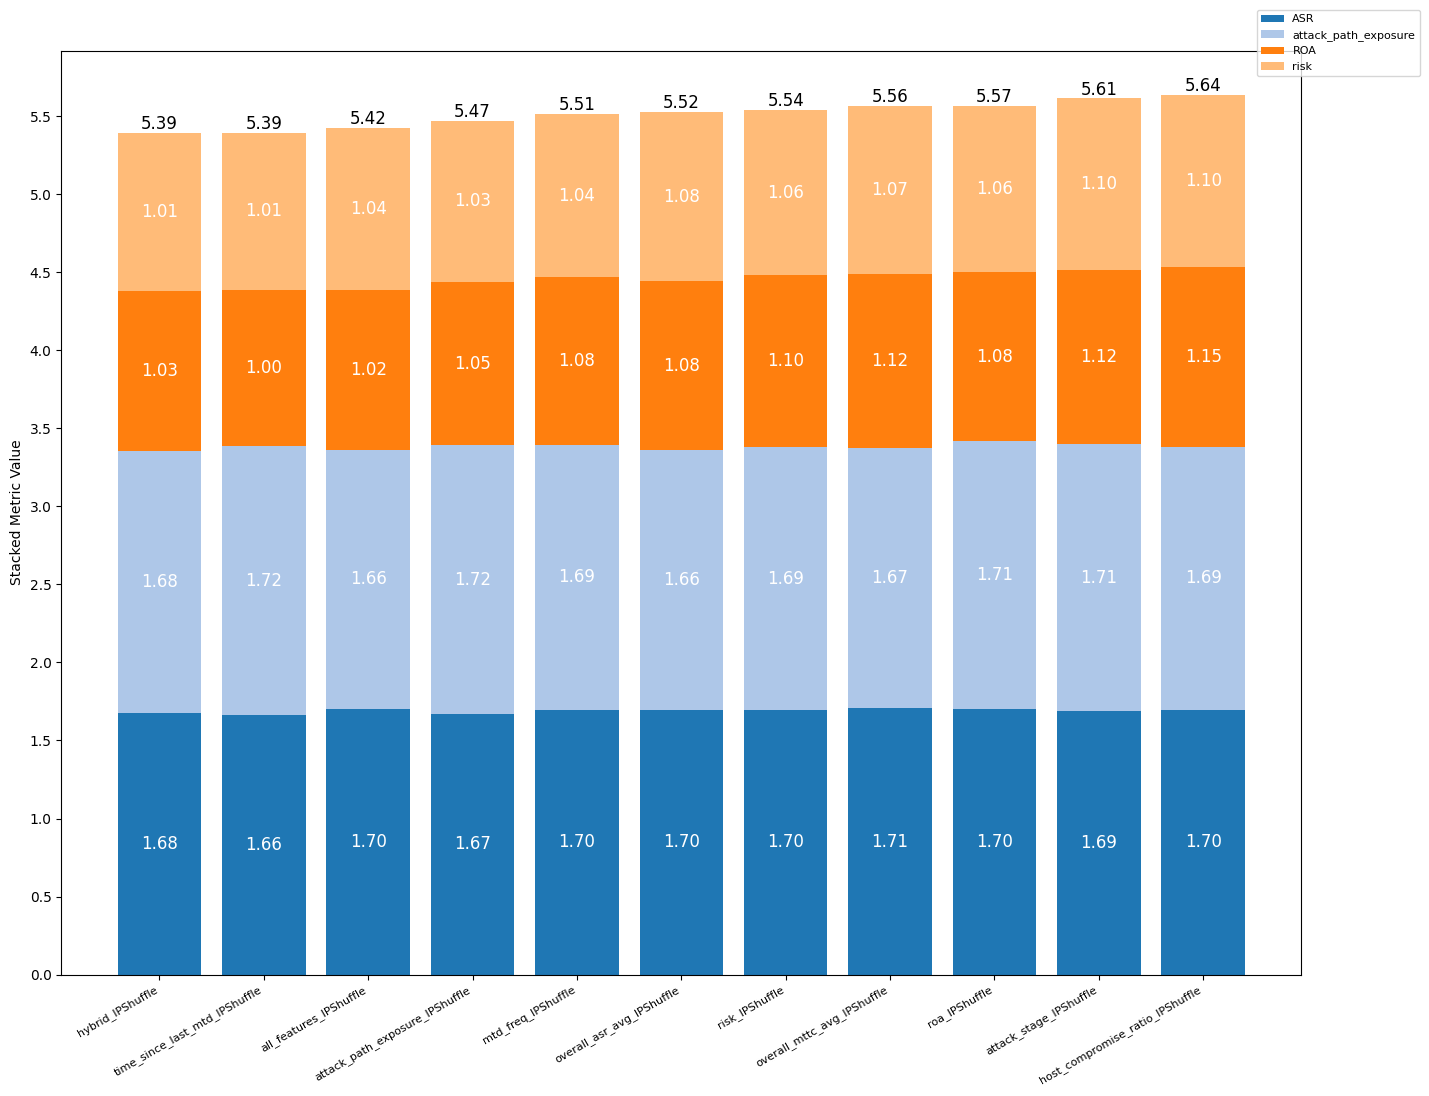

Index(['all_features_IPShuffle', 'hybrid_IPShuffle',
       'host_compromise_ratio_IPShuffle', 'attack_path_exposure_IPShuffle',
       'overall_asr_avg_IPShuffle', 'roa_IPShuffle', 'risk_IPShuffle',
       'attack_stage_IPShuffle', 'mtd_freq_IPShuffle',
       'overall_mttc_avg_IPShuffle', 'time_since_last_mtd_IPShuffle'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

Standard deviation for each metric:
ASR                     0.006408
attack_path_exposure    0.034383
ROA                     0.055884
risk                    0.040581
dtype: float64

Overall 'sum' standard deviation: 0.61



<Figure size 1600x1200 with 0 Axes>

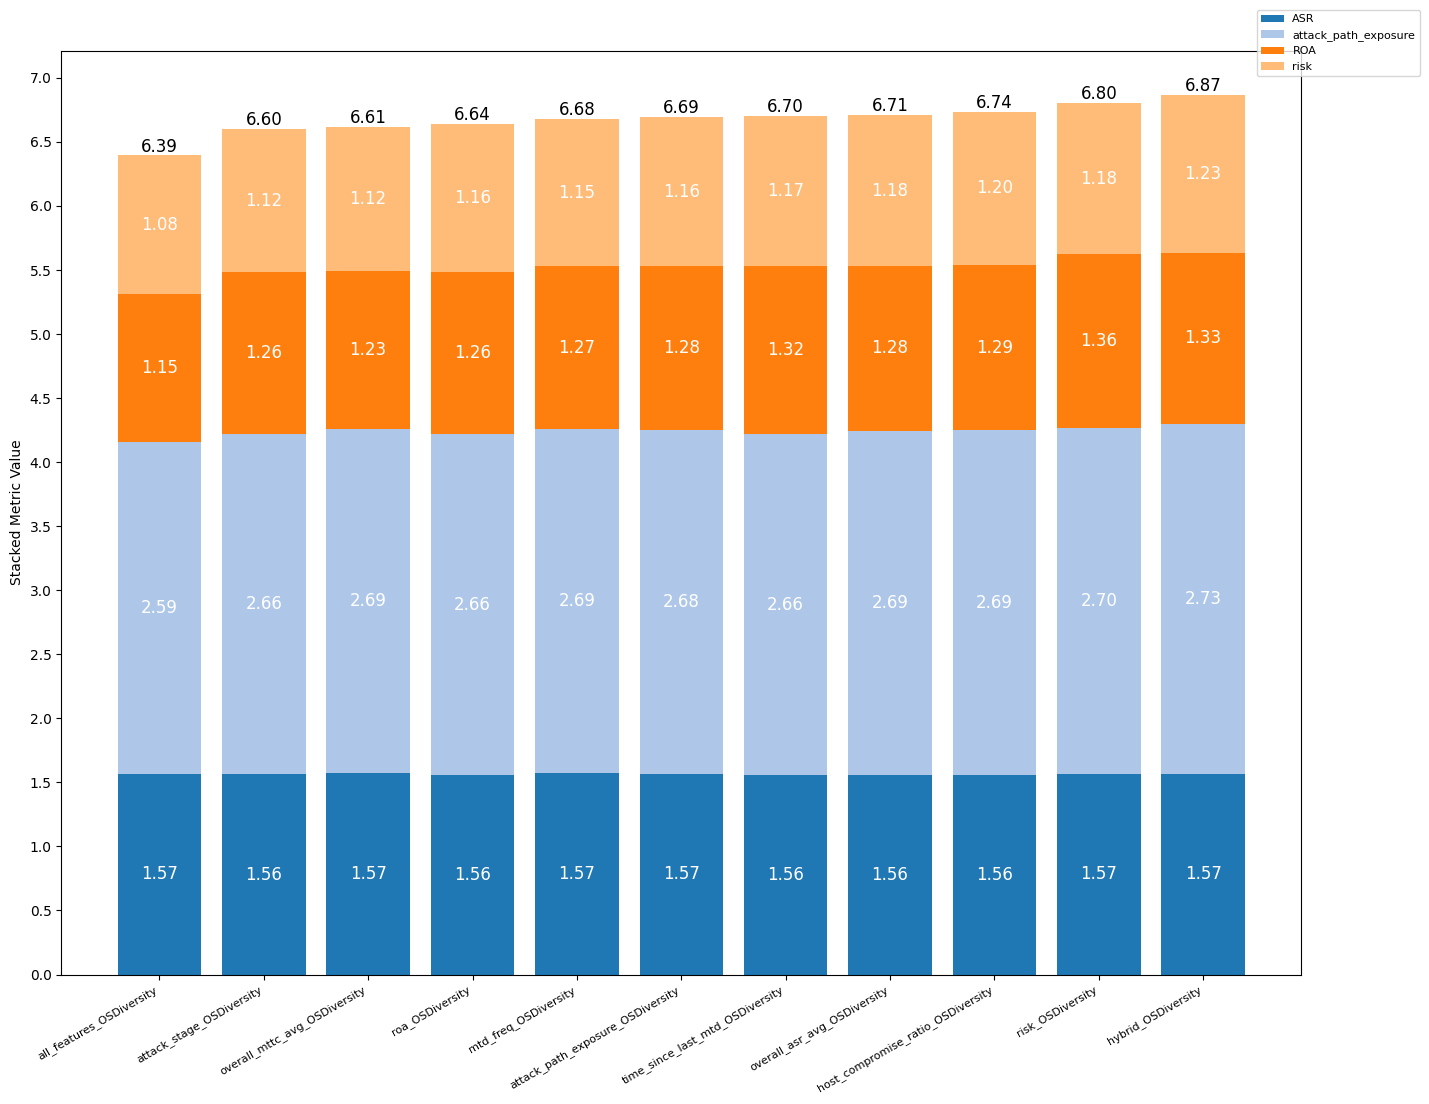

Index(['all_features_OSDiversity', 'hybrid_OSDiversity',
       'host_compromise_ratio_OSDiversity', 'attack_path_exposure_OSDiversity',
       'overall_asr_avg_OSDiversity', 'roa_OSDiversity', 'risk_OSDiversity',
       'attack_stage_OSDiversity', 'mtd_freq_OSDiversity',
       'overall_mttc_avg_OSDiversity', 'time_since_last_mtd_OSDiversity'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

Standard deviation for each metric:
ASR                     0.007904
attack_path_exposure    0.014278
ROA                     0.041287
risk                    0.038030
dtype: float64

Overall 'sum' standard deviation: 0.37



<Figure size 1600x1200 with 0 Axes>

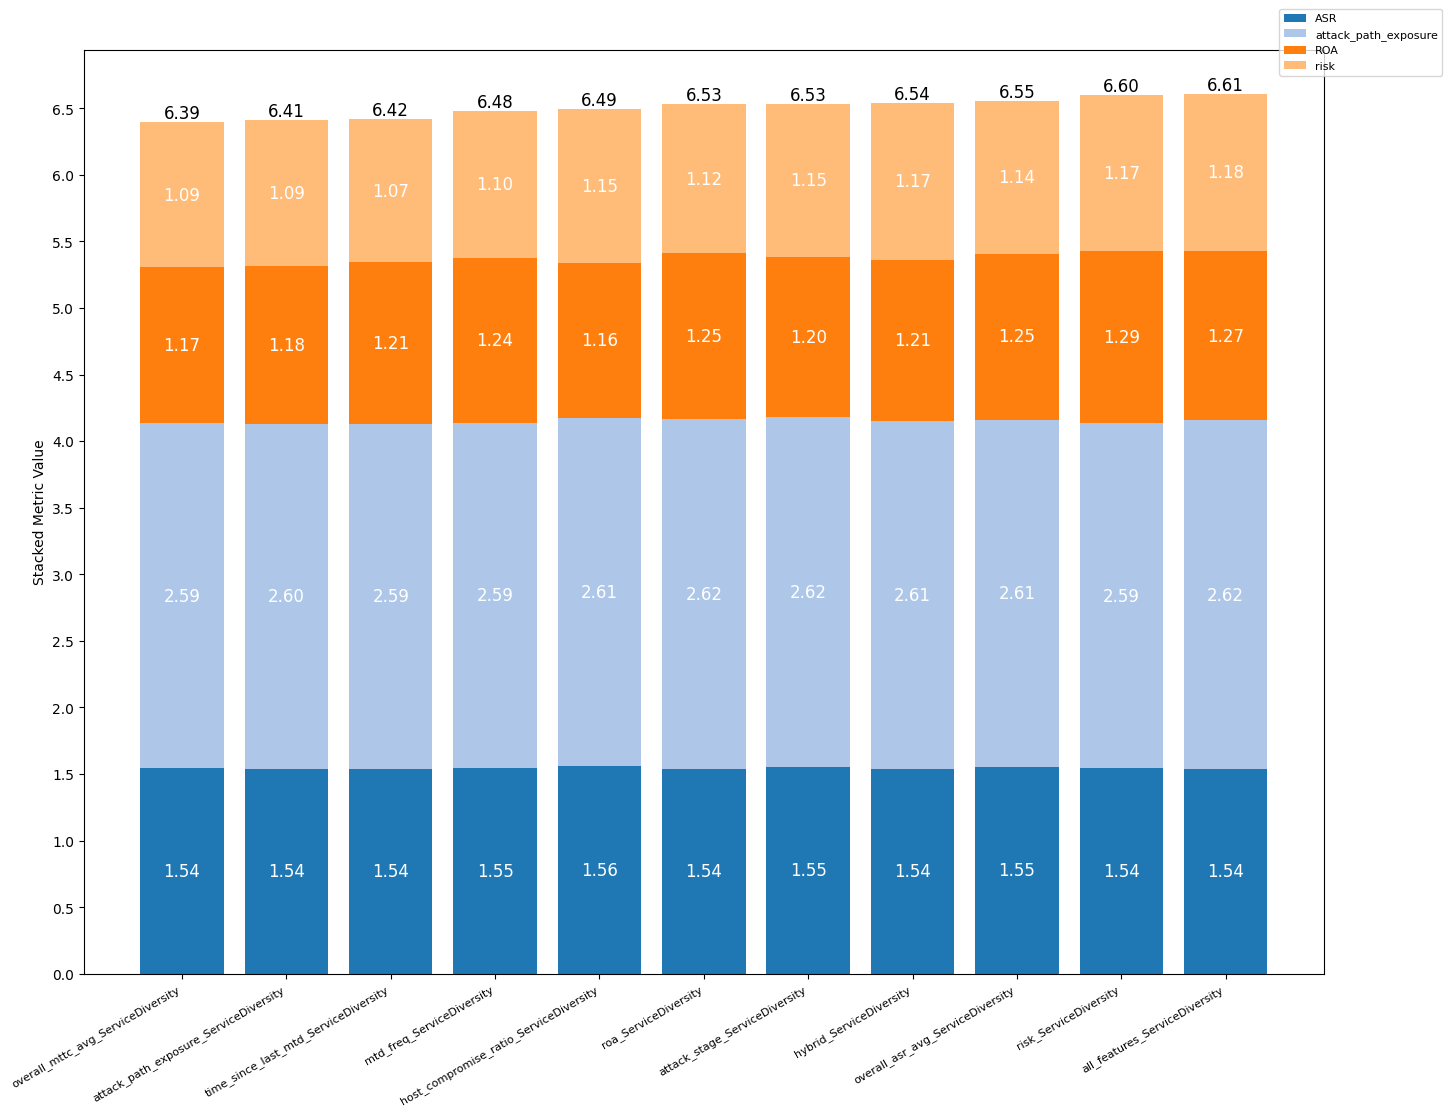

Index(['all_features_ServiceDiversity', 'hybrid_ServiceDiversity',
       'host_compromise_ratio_ServiceDiversity',
       'attack_path_exposure_ServiceDiversity',
       'overall_asr_avg_ServiceDiversity', 'roa_ServiceDiversity',
       'risk_ServiceDiversity', 'attack_stage_ServiceDiversity',
       'mtd_freq_ServiceDiversity', 'overall_mttc_avg_ServiceDiversity',
       'time_since_last_mtd_ServiceDiversity'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

In [2533]:

for mtd in mtd_schemes:  
    data_copy = data
    metric_data = data_copy.filter(regex=mtd)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = mtd, title=None)
    print(metric_data.columns)
    # Show the plot for the current metric
    plt.tight_layout()
    plt.show()



                      all_features_CompleteTopologyShuffle  \
ASR                                               1.515148   
attack_path_exposure                              2.215813   
ROA                                               1.220719   
risk                                              1.222908   
sum                                               6.174589   
zscore                                           -0.149579   
minmax                                            0.529221   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.701242                  1.565375   
attack_path_exposure                1.662832                  2.594755   
ROA                                 1.021801                  1.148786   
risk                                1.037370                  1.084165   
sum                                 5.423245                  6.393081   
zscore                             -1.924837               

<Figure size 1600x1200 with 0 Axes>

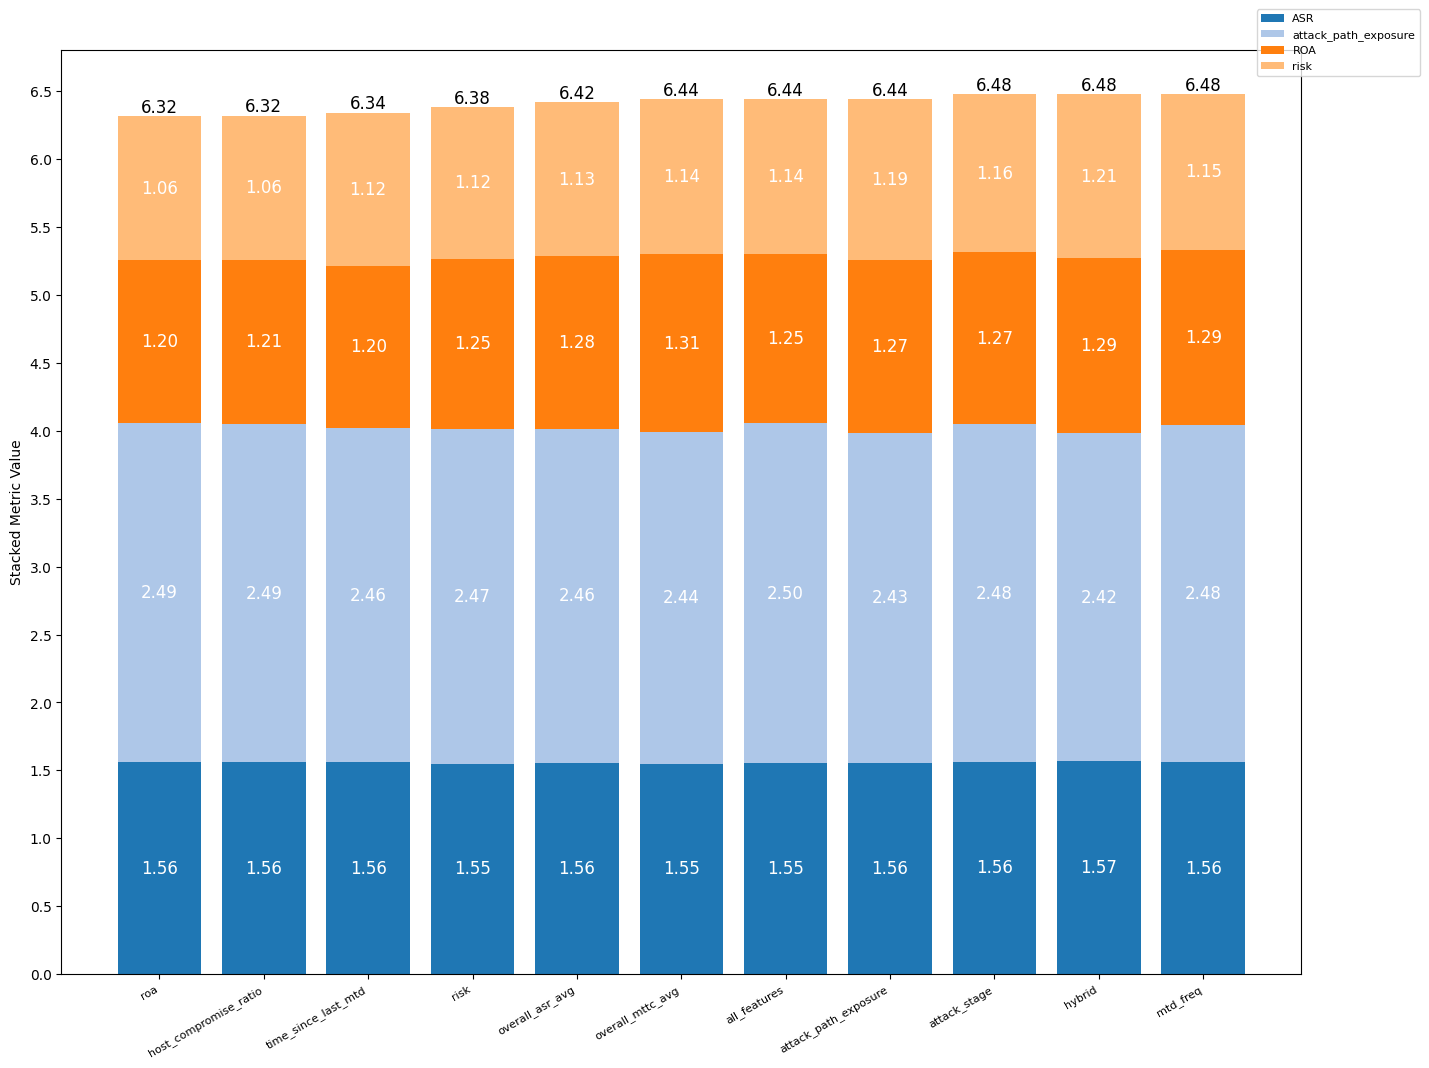

Index(['host_compromise_ratio', 'attack_path_exposure', 'overall_asr_avg',
       'roa', 'risk', 'attack_stage', 'mtd_freq', 'overall_mttc_avg',
       'time_since_last_mtd', 'hybrid', 'all_features'],
      dtype='object')


In [2534]:
static_features = ["host_compromise_ratio","attack_path_exposure",  "overall_asr_avg", "roa", "risk", "attack_stage"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metric = static_features + time_features + ['hybrid'] + ["all_features"]

data_copy = data
print(data_copy)
metric_data = data_copy[metric]
chart.process_weighted_metrics(metric_data)
# Create a new figure for each metric
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Plot the schemes for the current metric
chart.plot_n_schemes(name = "All_MTD", title=None)
print(metric_data.columns)
# Show the plot for the current metric
plt.show()

In [2535]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store mean and standard deviation DataFrames
    mean = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that contain the current metric as a substring
        related_columns = [col for col in df.columns if metric in col]
        # print(related_columns)
        if related_columns:
            # Calculate the mean for each related column
            mean_df = df[related_columns].mean(axis=1)
            # print(mean_df)
            mean[metric] = mean_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    mean_df = pd.DataFrame(mean)
    std_devs_df = pd.DataFrame(std_devs)

    return mean_df, std_devs_df

# Group by feature prefix and calculate the mean and standard deviation
mean_df, std_devs_df = group_by_feature(data)


In [2536]:
data

all_features_CompleteTopologyShuffle  \
ASR                                               1.515148   
attack_path_exposure                              2.215813   
ROA                                               1.220719   
risk                                              1.222908   
sum                                               6.174589   
zscore                                           -0.149579   
minmax                                            0.529221   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.701242                  1.565375   
attack_path_exposure                1.662832                  2.594755   
ROA                                 1.021801                  1.148786   
risk                                1.037370                  1.084165   
sum                                 5.423245                  6.393081   
zscore                             -1.924837                  0.366668   
minmax                              0.019667                  0.677400   

                      all_features_ServiceDiversity  all_features  \
ASR                                        1.537772      1.554173   
attack_path_exposure                       2.617528      2.502179   
ROA                                        1.273370      1.249090   
risk                                       1.179738      1.137075   
sum                                        6.608407      6.442518   
zscore                                     0.875436      0.483476   
minmax                                     0.823432      0.710927   

                      hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
ASR                                         1.511779          1.678982   
attack_path_exposure                        2.246400          1.675760   
ROA                                         1.243449          1.025649   
risk                                        1.190047          1.013855   
sum                                         6.191675          5.394246   
zscore                                     -0.109210         -1.993357   
minmax                                      0.540808          0.000000   

                      hybrid_OSDiversity  hybrid_ServiceDiversity    hybrid  \
ASR                             1.565805                 1.537456  1.565514   
attack_path_exposure            2.733862                 2.613721  2.420141   
ROA                             1.334288                 1.211483  1.286312   
risk                            1.234803                 1.173645  1.207306   
sum                             6.868759                 6.536304  6.479272   
zscore                          1.490589                 0.705073  0.570317   
minmax                          1.000000                 0.774533  0.735854   

                      ...  overall_mttc_avg_CompleteTopologyShuffle  \
ASR                   ...                                  1.521054   
attack_path_exposure  ...                                  2.211664   
ROA                   ...                                  1.195723   
risk                  ...                                  1.083840   
sum                   ...                                  6.012280   
zscore                ...                                 -0.533079   
minmax                ...                                  0.419145   

                      overall_mttc_avg_IPShuffle  \
ASR                                     1.705170   
attack_path_exposure                    1.667041   
ROA                                     1.116600   
risk                                    1.074146   
sum                                     5.562957   
zscore                                 -1.594730   
minmax                                  0.114418   

                      overall_mttc_avg_OSDiversity  \
ASR                                       1.570945   
attack_path_exposure                      2.689045   
ROA  

In [2537]:
# data[['all_features', 'all_features_CompleteTopologyShuffle', 'all_features_IPShuffle', 'all_features_OSDiversity', 'all_features_ServiceDiversity']].T['sum'].median()

In [2538]:
# data[['all_features']].T['sum'].mean()

In [2539]:
mean_df

all_features    hybrid  host_compromise_ratio  \
ASR                       1.574742  1.571907               1.579188   
attack_path_exposure      2.318621  2.337977               2.345059   
ROA                       1.182753  1.220236               1.186865   
risk                      1.132251  1.163931               1.128707   
sum                       6.208368  6.294051               6.239818   
zscore                   -0.069767  0.132683               0.004541   
minmax                    0.552130  0.610239               0.573458   

                      attack_path_exposure  overall_asr_avg       roa  \
ASR                               1.567747         1.577479  1.575996   
attack_path_exposure              2.329243         2.326949  2.346871   
ROA                               1.194719         1.214132  1.216636   
risk                              1.112207         1.132139  1.113613   
sum                               6.203916         6.250700  6.253117   
zscore                           -0.080287         0.030253  0.035964   
minmax                            0.549110         0.580839  0.582478   

                          risk  attack_stage  mtd_freq  overall_mttc_avg  \
ASR                   1.573885      1.577986  1.576181          1.577829   
attack_path_exposure  2.334130      2.335442  2.341917          2.320028   
ROA                   1.233884      1.222865  1.205152          1.205231   
risk                  1.122459      1.139364  1.098151          1.101868   
sum                   6.264359      6.275656  6.221402          6.204956   
zscore                0.062526      0.089219 -0.038971         -0.077830   
minmax                0.590102      0.597764  0.560969          0.549815   

                      time_since_last_mtd  
ASR                              1.565313  
attack_path_exposure             2.328896  
ROA                              1.195557  
risk                             1.110746  
sum                              6.200511  
zscore                          -0.088331  
minmax                           0.546801

In [2540]:
data_copy = mean_df.T.sort_values(by='sum').T

In [2541]:
import seaborn as sns

In [2542]:
data_copy

time_since_last_mtd  attack_path_exposure  \
ASR                              1.565313              1.567747   
attack_path_exposure             2.328896              2.329243   
ROA                              1.195557              1.194719   
risk                             1.110746              1.112207   
sum                              6.200511              6.203916   
zscore                          -0.088331             -0.080287   
minmax                           0.546801              0.549110   

                      overall_mttc_avg  all_features  mtd_freq  \
ASR                           1.577829      1.574742  1.576181   
attack_path_exposure          2.320028      2.318621  2.341917   
ROA                           1.205231      1.182753  1.205152   
risk                          1.101868      1.132251  1.098151   
sum                           6.204956      6.208368  6.221402   
zscore                       -0.077830     -0.069767 -0.038971   
minmax                        0.549815      0.552130  0.560969   

                      host_compromise_ratio  overall_asr_avg       roa  \
ASR                                1.579188         1.577479  1.575996   
attack_path_exposure               2.345059         2.326949  2.346871   
ROA                                1.186865         1.214132  1.216636   
risk                               1.128707         1.132139  1.113613   
sum                                6.239818         6.250700  6.253117   
zscore                             0.004541         0.030253  0.035964   
minmax                             0.573458         0.580839  0.582478   

                          risk  attack_stage    hybrid  
ASR                   1.573885      1.577986  1.571907  
attack_path_exposure  2.334130      2.335442  2.337977  
ROA                   1.233884      1.222865  1.220236  
risk                  1.122459      1.139364  1.163931  
sum                   6.264359      6.275656  6.294051  
zscore                0.062526      0.089219  0.132683  
minmax                0.590102      0.597764  0.610239

In [2543]:
std_devs_df.T

ASR  attack_path_exposure       ROA      risk  \
all_features           0.073197              0.399974  0.101381  0.073844   
hybrid                 0.063924              0.414255  0.118167  0.086896   
host_compromise_ratio  0.067249              0.406033  0.066167  0.051970   
attack_path_exposure   0.062440              0.384674  0.093577  0.061287   
overall_asr_avg        0.068553              0.412740  0.084435  0.035068   
roa                    0.073305              0.391568  0.080619  0.051574   
risk                   0.070373              0.401742  0.103142  0.052055   
attack_stage           0.065291              0.395011  0.064132  0.028885   
mtd_freq               0.072716              0.395593  0.090773  0.050572   
overall_mttc_avg       0.073394              0.407075  0.072368  0.027951   
time_since_last_mtd    0.058599              0.379697  0.117121  0.072038   

                            sum    zscore    minmax  
all_features           0.465439  1.099729  0.315656  
hybrid                 0.557542  1.317348  0.378119  
host_compromise_ratio  0.426785  1.008397  0.289441  
attack_path_exposure   0.477810  1.128959  0.324046  
overall_asr_avg        0.473124  1.117886  0.320868  
roa                    0.419452  0.991073  0.284468  
risk                   0.502597  1.187524  0.340856  
attack_stage           0.408619  0.965476  0.277121  
mtd_freq               0.477237  1.127605  0.323657  
overall_mttc_avg       0.420893  0.994477  0.285446  
time_since_last_mtd    0.492851  1.164497  0.334246

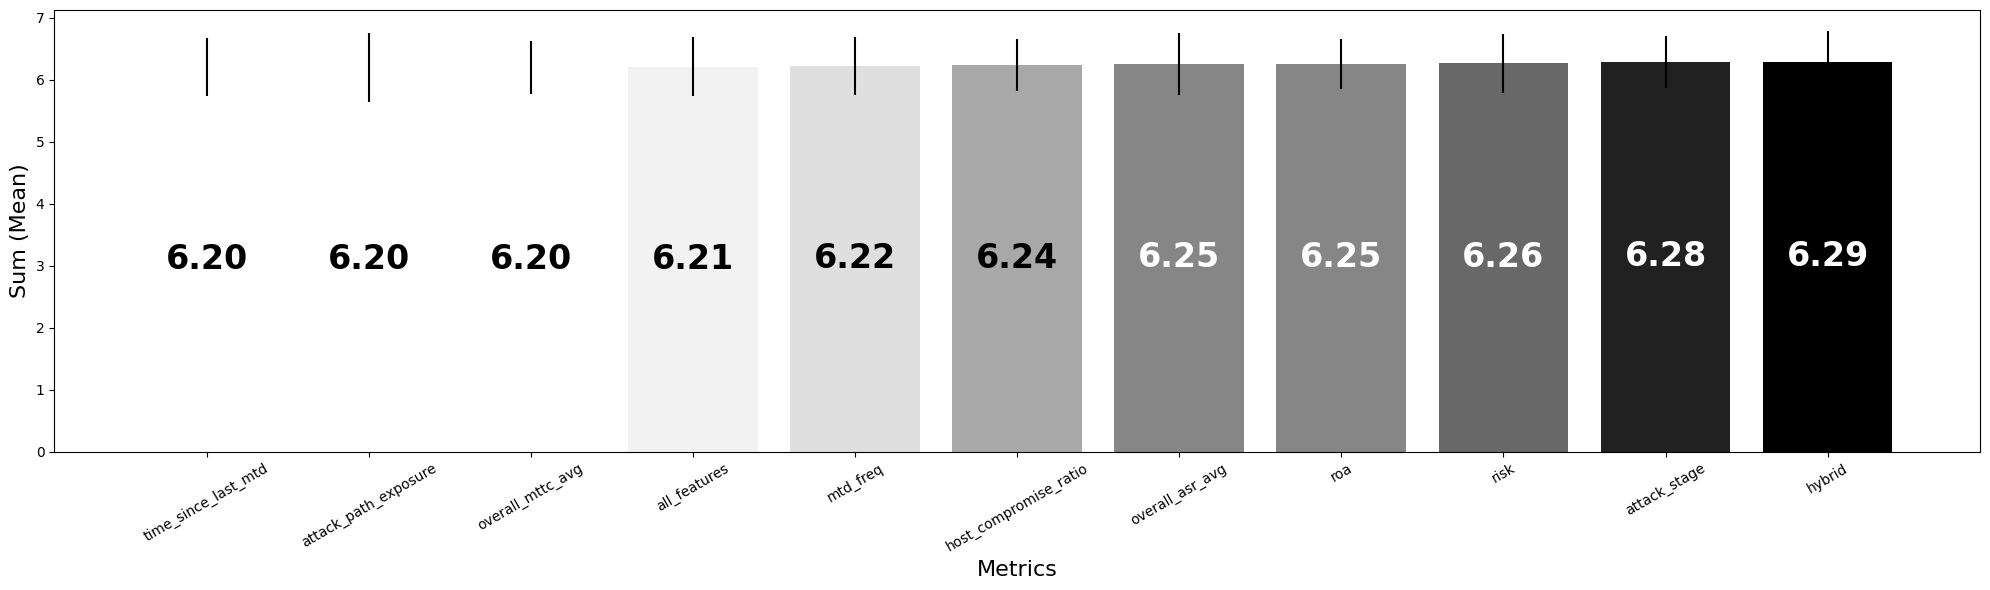

In [2544]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_copy' is a DataFrame containing metric data, and 'std_devs_df' contains standard deviations.

# Extract metric data and sort by 'sum'
metric_data = data_copy.T['sum'].sort_values()
metric_data = np.round(metric_data, 2)
# Normalize the data for grayscale shading
norm = plt.Normalize(vmin=metric_data.min(), vmax=metric_data.max())
cmap = plt.get_cmap("Greys")  # Use the Greys colormap for black shades

# Create a new figure
plt.figure(figsize=(20, 6))  # Adjust the size as needed

# Generate colors based on the grayscale colormap
bar_colors = cmap(norm(metric_data.values))

# Create a seaborn barplot with grayscale shades
ax = sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add numerical values in the center of the bars
for i, value in enumerate(metric_data.values):
    # Set text color: dark bars get white text, light bars get black text
    text_color = 'white' if norm(value) > 0.5 else 'black'
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=24, weight='bold')

# Add error bars using standard deviations
yerr = std_devs_df.T['sum'][:len(metric_data)]  # Ensure the yerr length matches metric_data
ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

# Set title and labels
plt.xlabel('Metrics', fontsize=16)
plt.ylabel(f'Sum (Mean)', fontsize=16)

# Show the plot for the current metric
plt.tight_layout()
plt.savefig("Overview.png")
plt.show()


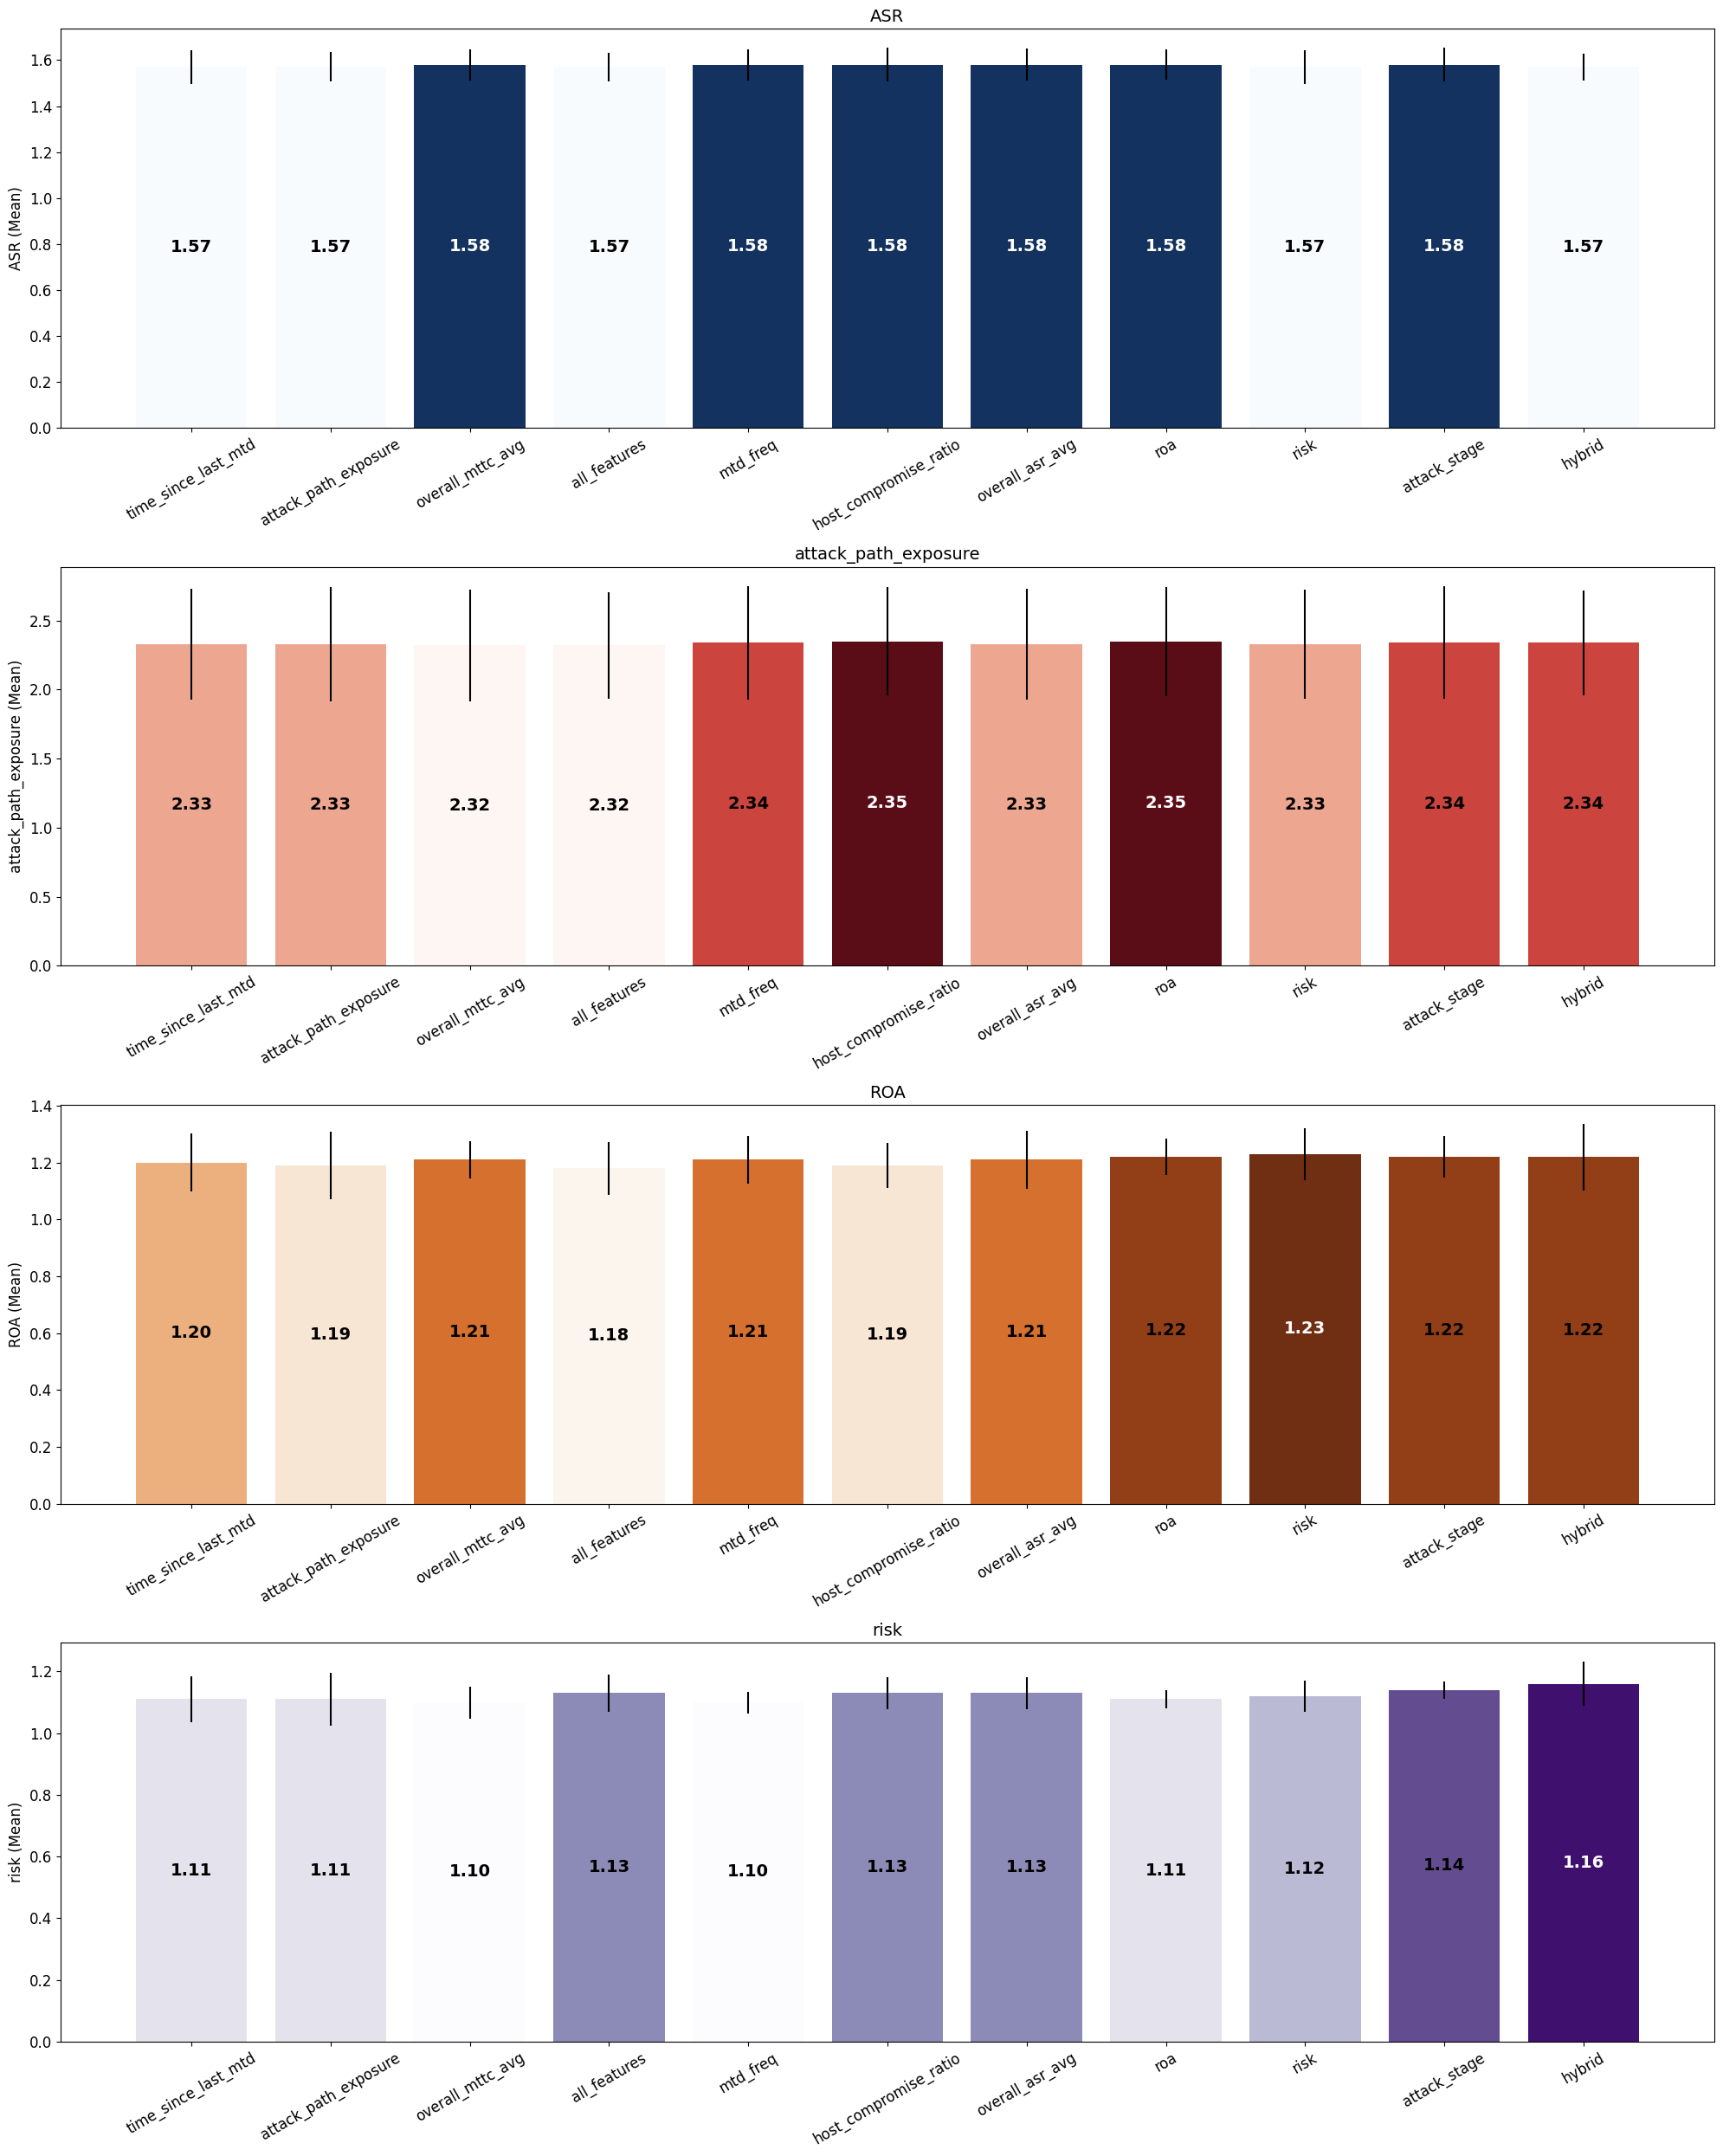

In [2545]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a different colormap for each evaluation metric
colormap_dict = {
    "ASR": "Blues",
    "time_to_compromise": "Greens",
    "attack_path_exposure": "Reds",
    "ROA": "Oranges",
    "risk": "Purples"
}

evaluation_metrics = ["ASR", "attack_path_exposure", "ROA", "risk"]

# Create a figure with subplots
fig, axes = plt.subplots(len(evaluation_metrics), 1, figsize=(20, 25), sharex=False)  # No shared x-axis

for ax, evaluation_metric in zip(axes, evaluation_metrics):
    # Extract metric data for the current evaluation metric
    metric_data = data_copy.T[evaluation_metric]
    metric_data = np.round(metric_data, 2)
    # Normalize the data for shading using the specific range for the current metric set
    lower_percentile = np.percentile(metric_data.values, 5)
    upper_percentile = np.percentile(metric_data.values, 95)
    norm = plt.Normalize(vmin=lower_percentile, vmax=upper_percentile)  # Normalization for current metric set

    # Select the colormap for the current metric
    cmap = plt.get_cmap(colormap_dict[evaluation_metric])

    # Create a seaborn barplot with shades based on the individual metric values
    bar_colors = cmap(norm(metric_data.values))
    sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors, ax=ax)

    # Add numerical values in the center of the bars
    for i, value in enumerate(metric_data.values):
        # Set text color: dark bars get white text, light bars get black text
        text_color = 'white' if norm(value) > 0.95 else 'black'
        ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=14, weight='bold')

    # Add error bars using standard deviations
    yerr = std_devs_df.T[evaluation_metric][:len(metric_data)]  # Ensure yerr length matches metric_data
    ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

    # Set title and labels for each subplot
    ax.set_title(f'{evaluation_metric}', fontsize=14)
    ax.set_ylabel(f'{evaluation_metric} (Mean)', fontsize=12)

# Set common x-ticks for all subplots and increase tick font size
for ax in axes:
    ax.tick_params(axis='x', rotation=30, labelsize=12)  # Set labelsize to your desired font size
    ax.tick_params(axis='y', labelsize=12)  # Optionally increase y-axis tick size as well

# Adjust layout
plt.tight_layout()
plt.savefig("All_Metrics_Overview.png")
plt.show()


In [2546]:
other_schemes

simultaneous    random  alternative
ASR                       2.718747  1.478246     1.472455
attack_path_exposure      0.928564  0.928938     0.926660
ROA                       0.986561  0.743996     0.734480
risk                      1.134298  0.912069     0.973734

In [2547]:
trimmed_data = data_copy.T.drop(['sum', 'zscore', 'minmax'], axis=1).T


In [2548]:
comparison_data = pd.concat([trimmed_data, other_schemes], axis=1)


In [2549]:
comparison_data

time_since_last_mtd  attack_path_exposure  \
ASR                              1.565313              1.567747   
attack_path_exposure             2.328896              2.329243   
ROA                              1.195557              1.194719   
risk                             1.110746              1.112207   

                      overall_mttc_avg  all_features  mtd_freq  \
ASR                           1.577829      1.574742  1.576181   
attack_path_exposure          2.320028      2.318621  2.341917   
ROA                           1.205231      1.182753  1.205152   
risk                          1.101868      1.132251  1.098151   

                      host_compromise_ratio  overall_asr_avg       roa  \
ASR                                1.579188         1.577479  1.575996   
attack_path_exposure               2.345059         2.326949  2.346871   
ROA                                1.186865         1.214132  1.216636   
risk                               1.128707         1.132139  1.113613   

                          risk  attack_stage    hybrid  simultaneous  \
ASR                   1.573885      1.577986  1.571907      2.718747   
attack_path_exposure  2.334130      2.335442  2.337977      0.928564   
ROA                   1.233884      1.222865  1.220236      0.986561   
risk                  1.122459      1.139364  1.163931      1.134298   

                        random  alternative  
ASR                   1.478246     1.472455  
attack_path_exposure  0.928938     0.926660  
ROA                   0.743996     0.734480  
risk                  0.912069     0.973734

In [2550]:
data

all_features_CompleteTopologyShuffle  \
ASR                                               1.515148   
attack_path_exposure                              2.215813   
ROA                                               1.220719   
risk                                              1.222908   
sum                                               6.174589   
zscore                                           -0.149579   
minmax                                            0.529221   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.701242                  1.565375   
attack_path_exposure                1.662832                  2.594755   
ROA                                 1.021801                  1.148786   
risk                                1.037370                  1.084165   
sum                                 5.423245                  6.393081   
zscore                             -1.924837                  0.366668   
minmax                              0.019667                  0.677400   

                      all_features_ServiceDiversity  all_features  \
ASR                                        1.537772      1.554173   
attack_path_exposure                       2.617528      2.502179   
ROA                                        1.273370      1.249090   
risk                                       1.179738      1.137075   
sum                                        6.608407      6.442518   
zscore                                     0.875436      0.483476   
minmax                                     0.823432      0.710927   

                      hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
ASR                                         1.511779          1.678982   
attack_path_exposure                        2.246400          1.675760   
ROA                                         1.243449          1.025649   
risk                                        1.190047          1.013855   
sum                                         6.191675          5.394246   
zscore                                     -0.109210         -1.993357   
minmax                                      0.540808          0.000000   

                      hybrid_OSDiversity  hybrid_ServiceDiversity    hybrid  \
ASR                             1.565805                 1.537456  1.565514   
attack_path_exposure            2.733862                 2.613721  2.420141   
ROA                             1.334288                 1.211483  1.286312   
risk                            1.234803                 1.173645  1.207306   
sum                             6.868759                 6.536304  6.479272   
zscore                          1.490589                 0.705073  0.570317   
minmax                          1.000000                 0.774533  0.735854   

                      ...  overall_mttc_avg_CompleteTopologyShuffle  \
ASR                   ...                                  1.521054   
attack_path_exposure  ...                                  2.211664   
ROA                   ...                                  1.195723   
risk                  ...                                  1.083840   
sum                   ...                                  6.012280   
zscore                ...                                 -0.533079   
minmax                ...                                  0.419145   

                      overall_mttc_avg_IPShuffle  \
ASR                                     1.705170   
attack_path_exposure                    1.667041   
ROA                                     1.116600   
risk                                    1.074146   
sum                                     5.562957   
zscore                                 -1.594730   
minmax                                  0.114418   

                      overall_mttc_avg_OSDiversity  \
ASR                                       1.570945   
attack_path_exposure                      2.689045   
ROA  

In [2551]:
combined_data

all_features_CompleteTopologyShuffle  \
ASR                                               1.515148   
attack_path_exposure                              2.215813   
ROA                                               1.220719   
risk                                              1.222908   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.701242                  1.565375   
attack_path_exposure                1.662832                  2.594755   
ROA                                 1.021801                  1.148786   
risk                                1.037370                  1.084165   

                      all_features_ServiceDiversity  all_features  \
ASR                                        1.537772      1.554173   
attack_path_exposure                       2.617528      2.502179   
ROA                                        1.273370      1.249090   
risk                                       1.179738      1.137075   

                      hybrid_CompleteTopologyShuffle  hybrid_IPShuffle  \
ASR                                         1.511779          1.678982   
attack_path_exposure                        2.246400          1.675760   
ROA                                         1.243449          1.025649   
risk                                        1.190047          1.013855   

                      hybrid_OSDiversity  hybrid_ServiceDiversity    hybrid  \
ASR                             1.565805                 1.537456  1.565514   
attack_path_exposure            2.733862                 2.613721  2.420141   
ROA                             1.334288                 1.211483  1.286312   
risk                            1.234803                 1.173645  1.207306   

                      ...  overall_mttc_avg_ServiceDiversity  \
ASR                   ...                           1.541962   
attack_path_exposure  ...                           2.592249   
ROA                   ...                           1.170356   
risk                  ...                           1.089403   

                      overall_mttc_avg  \
ASR                           1.550013   
attack_path_exposure          2.440142   
ROA                           1.310078   
risk                          1.140506   

                      time_since_last_mtd_CompleteTopologyShuffle  \
ASR                                                      1.508145   
attack_path_exposure                                     2.211664   
ROA                                                      1.246372   
risk                                                     1.179879   

                      time_since_last_mtd_IPShuffle  \
ASR                                        1.663715   
attack_path_exposure                       1.722391   
ROA                                        1.002880   
risk                                       1.005583   

                      time_since_last_mtd_OSDiversity  \
ASR                                          1.555809   
attack_path_exposure                         2.659974   
ROA                                          1.317353   
risk                                         1.169323   

                      time_since_last_mtd_ServiceDiversity  \
ASR                                               1.539686   
attack_path_exposure                              2.589975   
ROA                                               1.213557   
risk                                              1.074634   

                      time_since_last_mtd  simultaneous    random  alternative  
ASR                              1.559208      2.718747  1.478246     1.472455  
attack_path_exposure             2.460476      0.928564  0.928938     0.926660  
ROA                              1.197624      0.986561  0.743996     0.734480  
risk                             1.124309      1.134298  0.912069     0.973734  

[4 rows x 58 columns]

Standard deviation for each metric:
ASR                     0.280083
attack_path_exposure    0.635702
ROA                     0.177164
risk                    0.088245
dtype: float64

Overall 'sum' standard deviation: 0.81



<Figure size 1600x1200 with 0 Axes>

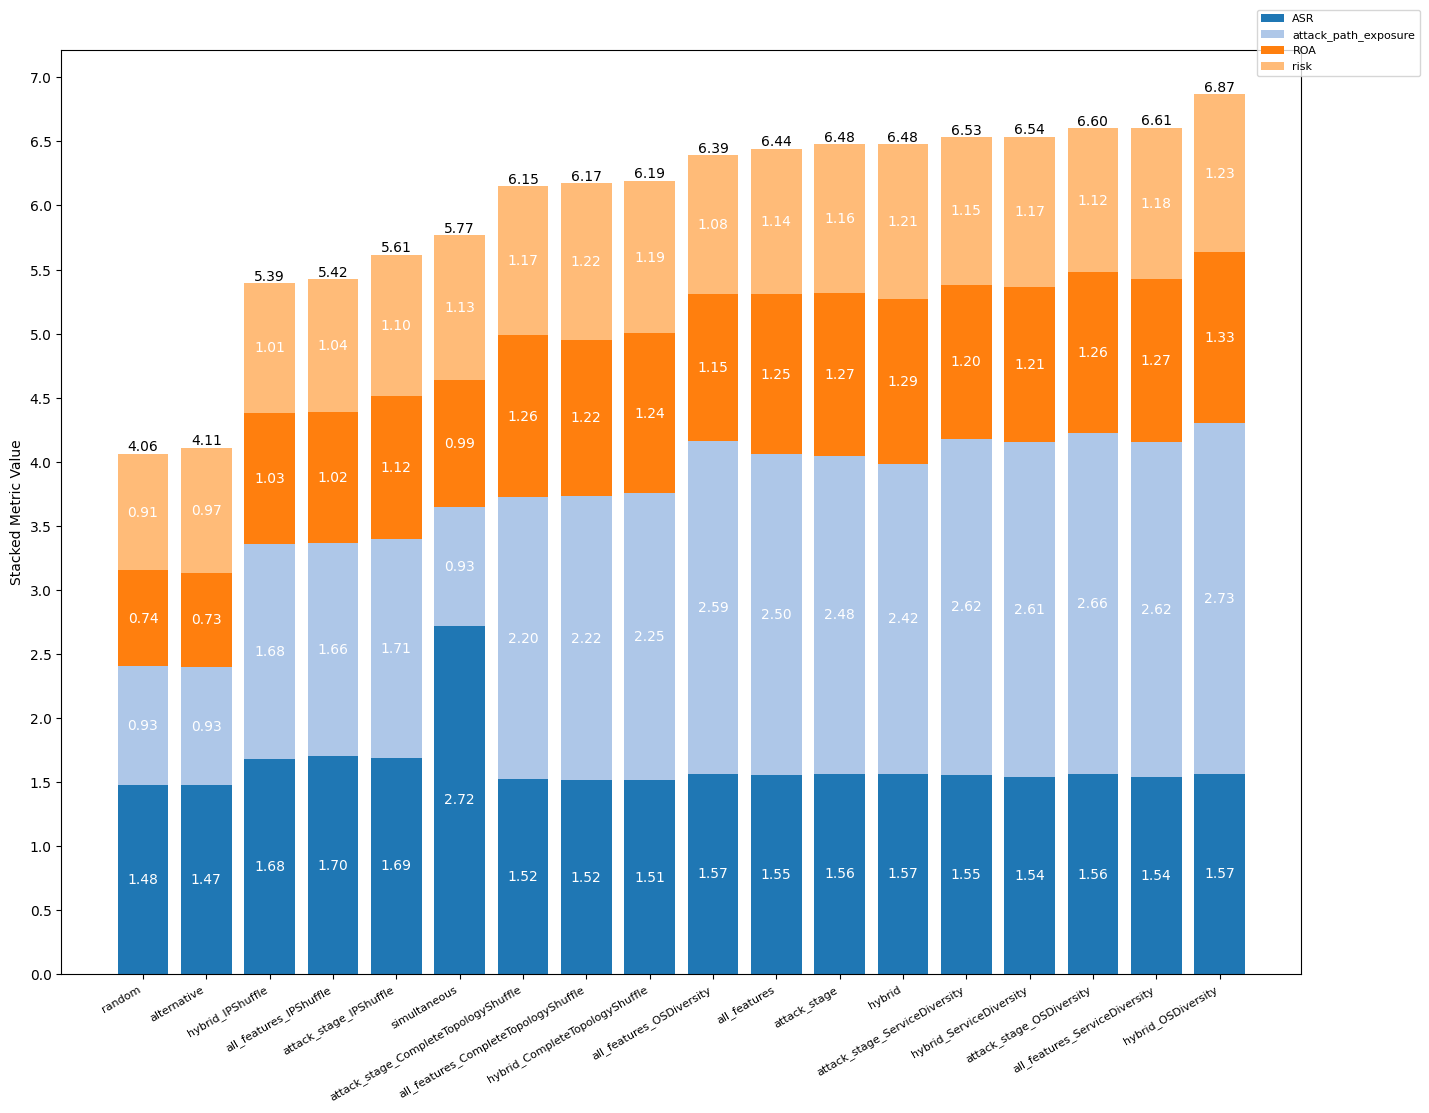

In [2552]:
best_models = ['all_features', "hybrid", "attack_stage","random", "alternative", "simultaneous"]


# Ensure data_copy is defined before the loop
data_copy = comparison_data

# Create a regex pattern that combines all best model names
pattern = '|'.join(best_models)  # This creates a pattern like 'mtd_freq|host_compromise_ratio'


# Filter the DataFrame for columns that match any of the best models
metric_data = combined_data.filter(regex=pattern)

# Process the weighted metrics for the current metric
chart.process_weighted_metrics(metric_data)

# Create a new figure for each metric
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Plot the schemes for the current metric with a relevant title
chart.plot_n_schemes(name="Scheme_comparisons", title = None, number_font_size=10)




In [2553]:
def group_columns_by_mtd(df):
    mtd_strategies = ['CompleteTopologyShuffle', 'IPShuffle', 'OSDiversity', 'ServiceDiversity']
    
    # Initialize empty groups
    groups = {
        'All MTD': [],
        'CompleteTopologyShuffle': [],
        'IPShuffle': [],
        'OSDiversity': [],
        'ServiceDiversity': []
    }

    # Iterate through each column name in the DataFrame
    for col in df.columns:
        # Check if the column contains any MTD strategy
        if any(mtd in col for mtd in mtd_strategies):
            # Group by the specific MTD strategy found in the column
            for mtd in mtd_strategies:
                if mtd in col:
                    groups[mtd].append(col)
                    break
        else:
            # If no MTD strategy is found in the column, it belongs to 'All MTD'
            groups['All MTD'].append(col)

    return groups
groups = group_columns_by_mtd(data)

In [2554]:
groups

{'All MTD': ['all_features',
  'hybrid',
  'host_compromise_ratio',
  'attack_path_exposure',
  'overall_asr_avg',
  'roa',
  'risk',
  'attack_stage',
  'mtd_freq',
  'overall_mttc_avg',
  'time_since_last_mtd'],
 'CompleteTopologyShuffle': ['all_features_CompleteTopologyShuffle',
  'hybrid_CompleteTopologyShuffle',
  'host_compromise_ratio_CompleteTopologyShuffle',
  'attack_path_exposure_CompleteTopologyShuffle',
  'overall_asr_avg_CompleteTopologyShuffle',
  'roa_CompleteTopologyShuffle',
  'risk_CompleteTopologyShuffle',
  'attack_stage_CompleteTopologyShuffle',
  'mtd_freq_CompleteTopologyShuffle',
  'overall_mttc_avg_CompleteTopologyShuffle',
  'time_since_last_mtd_CompleteTopologyShuffle'],
 'IPShuffle': ['all_features_IPShuffle',
  'hybrid_IPShuffle',
  'host_compromise_ratio_IPShuffle',
  'attack_path_exposure_IPShuffle',
  'overall_asr_avg_IPShuffle',
  'roa_IPShuffle',
  'risk_IPShuffle',
  'attack_stage_IPShuffle',
  'mtd_freq_IPShuffle',
  'overall_mttc_avg_IPShuffle',
  

In [2555]:
all_features_metrics = ['all_features', "hybrid"]
single_metrics = ['time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq',  'attack_stage', 'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk','overall_asr_avg', ]


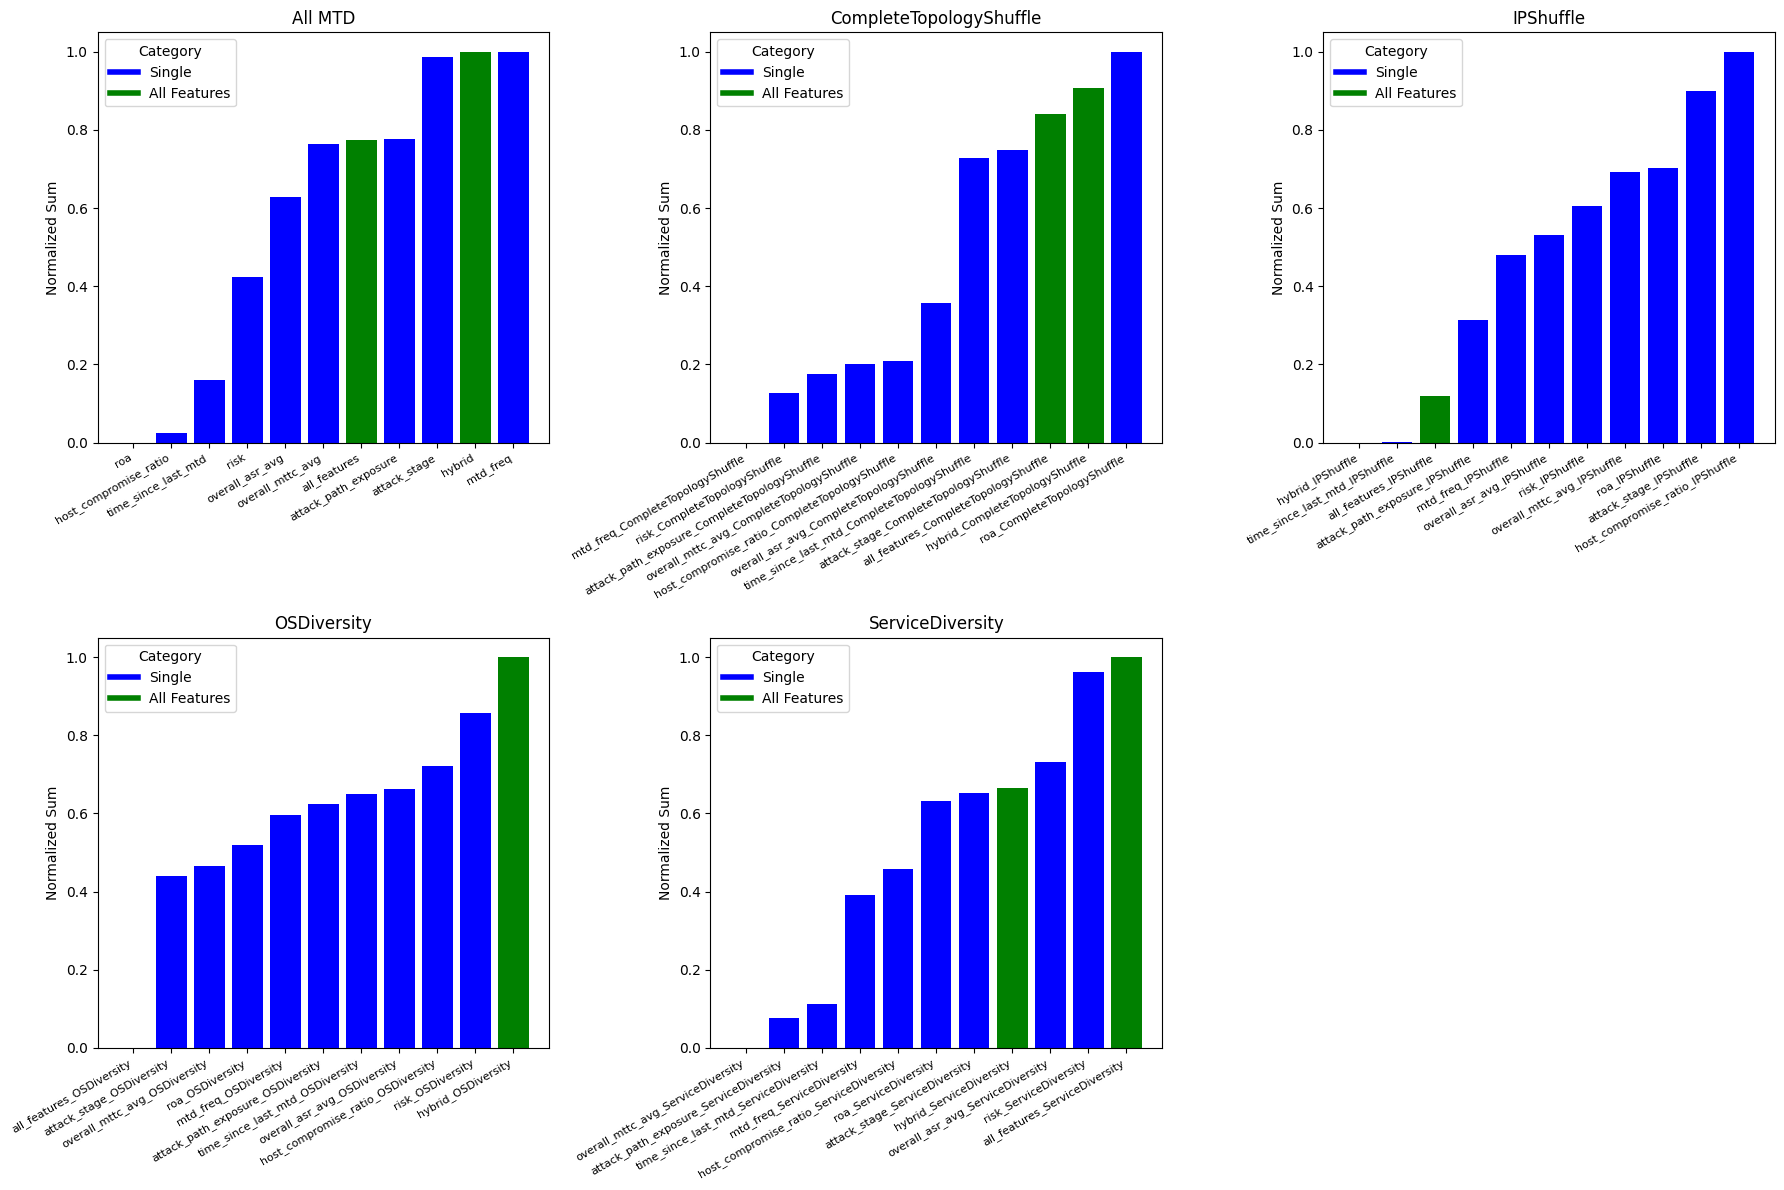

In [2556]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(data, groups, all_features_metrics, single_metrics):
    """
    Plot metrics with color coding based on their category (All Features or Single) using subplots.

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - all_features_metrics (list): List of metrics considered as All Features.
    - single_metrics (list): List of metrics considered as Single.
    """
    # Create a color mapping
    colors = {'Single': 'blue', 'All Features': 'green'}

    # Create legend handles
    handles = [plt.Line2D([0], [0], color=colors['Single'], lw=4),
               plt.Line2D([0], [0], color=colors['All Features'], lw=4)]
    labels = ['Single', 'All Features']

    # Create subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Flatten the axes for easier indexing
    axs = axs.flatten()

    for i, mtd in enumerate(groups):
        if i >= 5:  # Limit to 5 subplots (3 on the first row, 2 on the second)
            break
        
        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)

        # Plot on the respective subplot
        ax = axs[i]  # Access the correct subplot

        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name
            if any(single_metric in metric for single_metric in single_metrics):
                category = 'Single'
            else:  # Everything else falls under 'All Features'
                category = 'All Features'

            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels and title to each subplot
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticklabels(sorted_data.index, rotation=30, ha='right', fontsize=8)
        ax.legend(handles=handles, labels=labels, title='Category')

    # Remove the last empty subplot
    fig.delaxes(axs[5])  # Remove the last axis (empty graph)

    # Adjust the layout for centering the last two graphs
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('single_versus_all_features.png')
    plt.show()

# Example usage:
# Assuming `data` and `groups` are defined, and the metric lists are provided
plot_metrics_by_category(data, groups, all_features_metrics, single_metrics)


In [2557]:
all_features_metrics = ['all_features', "hybrid"]
regular_metrics = [    'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk', 'overall_asr_avg', "attack_stage"]
time_metrics = ['time_since_last_mtd', 'mtd_freq', 'overall_mttc_avg' ]

Index(['roa', 'host_compromise_ratio', 'time_since_last_mtd', 'risk',
       'overall_asr_avg', 'overall_mttc_avg', 'all_features',
       'attack_path_exposure', 'attack_stage', 'hybrid', 'mtd_freq'],
      dtype='object')
Index(['mtd_freq_CompleteTopologyShuffle', 'risk_CompleteTopologyShuffle',
       'attack_path_exposure_CompleteTopologyShuffle',
       'overall_mttc_avg_CompleteTopologyShuffle',
       'host_compromise_ratio_CompleteTopologyShuffle',
       'overall_asr_avg_CompleteTopologyShuffle',
       'time_since_last_mtd_CompleteTopologyShuffle',
       'attack_stage_CompleteTopologyShuffle',
       'all_features_CompleteTopologyShuffle',
       'hybrid_CompleteTopologyShuffle', 'roa_CompleteTopologyShuffle'],
      dtype='object')
Index(['hybrid_IPShuffle', 'time_since_last_mtd_IPShuffle',
       'all_features_IPShuffle', 'attack_path_exposure_IPShuffle',
       'mtd_freq_IPShuffle', 'overall_asr_avg_IPShuffle', 'risk_IPShuffle',
       'overall_mttc_avg_IPShuffle', 'roa_I

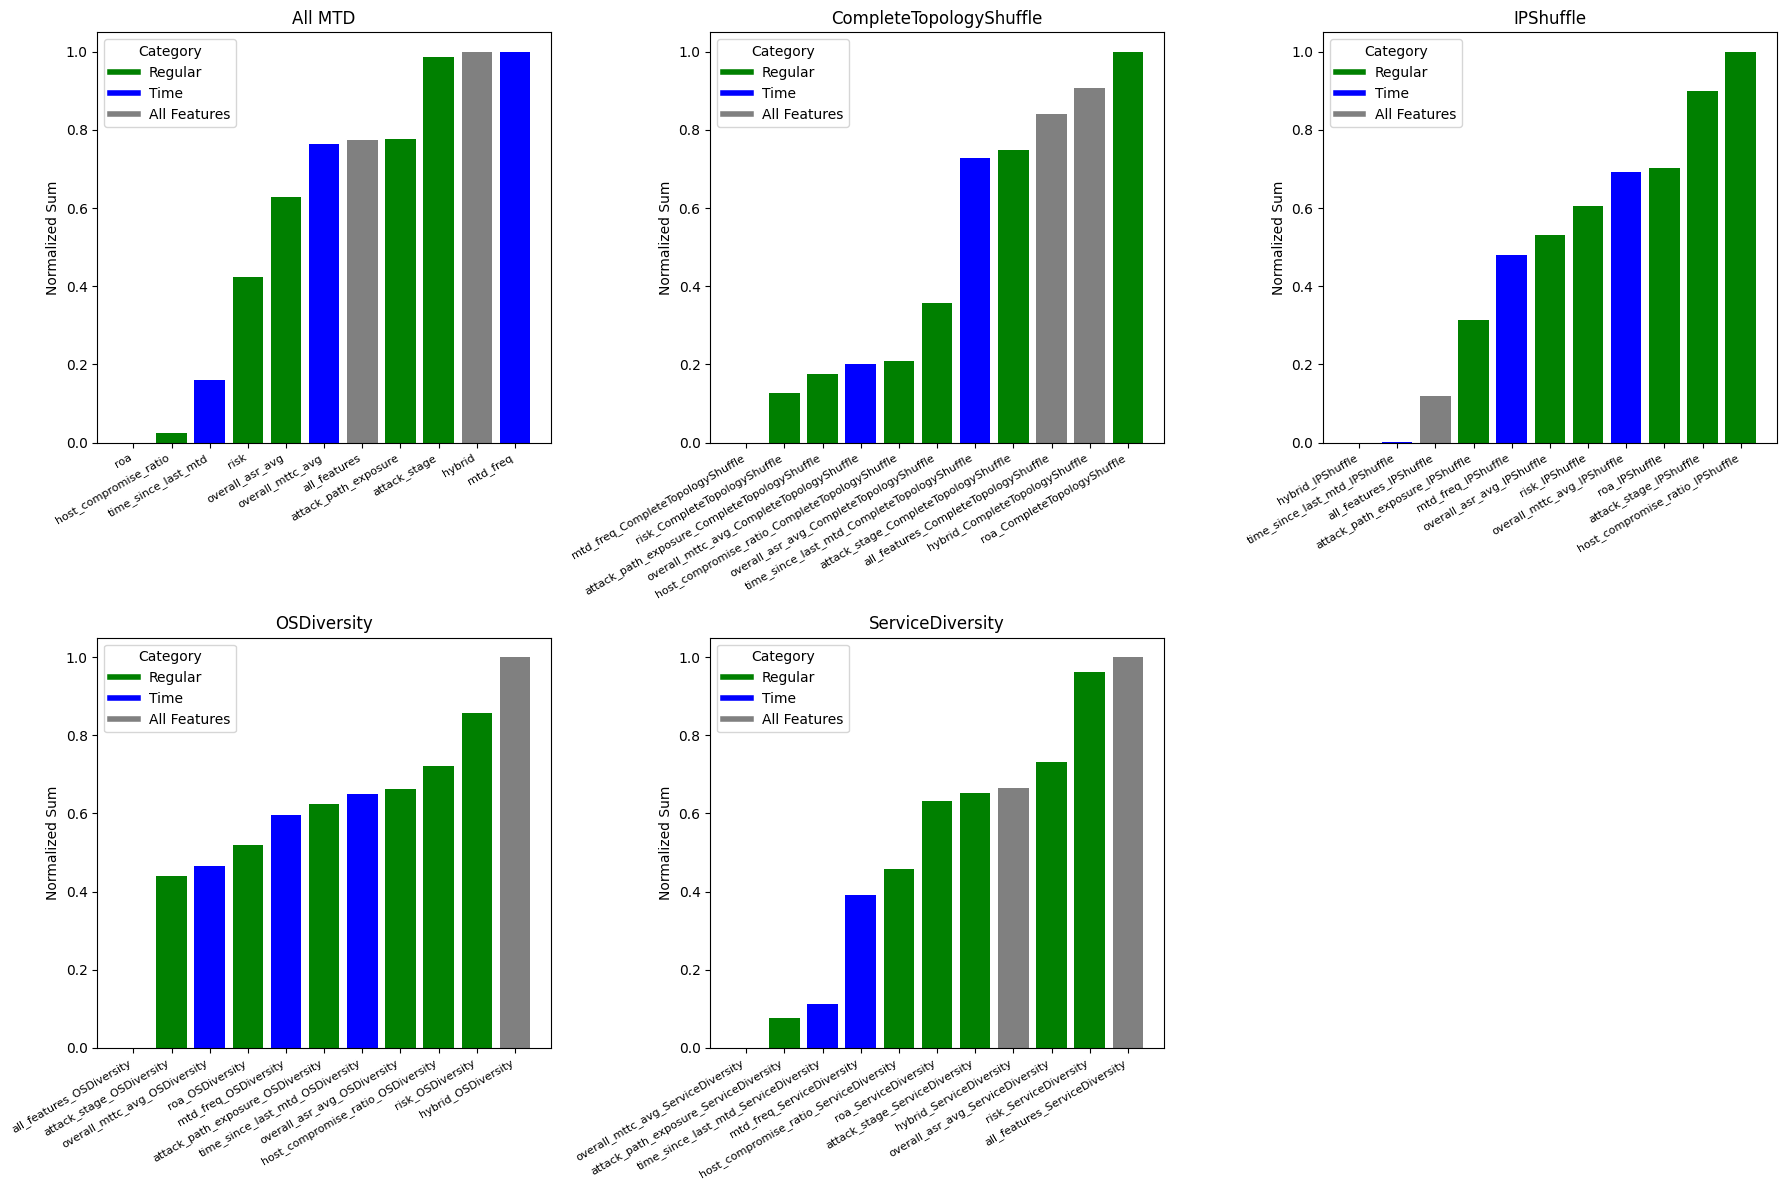

In [2558]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_extended(data, groups, all_features_metrics, regular_metrics, time_metrics):
    """
    Plot metrics with color coding based on their category (All Features, Regular, or Time) using subplots.

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - all_features_metrics (list): List of metrics considered as All Features.
    - regular_metrics (list): List of metrics considered as Regular.
    - time_metrics (list): List of metrics considered as Time.
    """
    # Create a color mapping
    colors = {
        'Regular': 'green',
        'Time': 'blue',
        'All Features': 'grey'
    }

    # Create legend handles
    handles = [
        plt.Line2D([0], [0], color=colors['Regular'], lw=4),
        plt.Line2D([0], [0], color=colors['Time'], lw=4),
        plt.Line2D([0], [0], color=colors['All Features'], lw=4)
    ]
    labels = ['Regular', 'Time', 'All Features']

    # Create subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Flatten the axes for easier indexing
    axs = axs.flatten()

    for i, mtd in enumerate(groups):
        if i >= 5:  # Limit to 5 subplots (3 on the first row, 2 on the second)
            break
        
        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)

        # Plot on the respective subplot
        ax = axs[i]  # Access the correct subplot
        print(sorted_data.index)
        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name using substring checks
            if any(regular_metric in metric for regular_metric in regular_metrics):
                category = 'Regular'
            elif any(time_metric in metric for time_metric in time_metrics):
                category = 'Time'

            else:  # Everything else falls under 'All Features'
                category = 'All Features'


            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels and title to each subplot
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticks(range(len(sorted_data.index)))  # Set x-ticks to match number of metrics
        ax.set_xticklabels(sorted_data.index, rotation=30, ha='right', fontsize=8)

        # Add the legend to each subplot after plotting
        ax.legend(handles=handles, labels=labels, title='Category')

    # Remove the last empty subplot if there are less than 6 plots
    if len(groups) < 6:
        fig.delaxes(axs[5])  # Remove the last axis (empty graph)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('regular_vs_time_metrics.png')
    plt.show()

# Example usage:
# Assuming `data`, `groups`, `all_features_metrics`, `regular_metrics`, and `time_metrics` are defined
plot_metrics_by_category_extended(data, groups, all_features_metrics, regular_metrics, time_metrics)
